In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [5]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.special import beta as beta_func
from scipy.integrate import quad
np.random.seed(42)

# Beta Bridge

In [6]:
#functions

#change the basis, i.e. x -> t(x)

"""Transforms"""
def logit_transform(theta):
    return(np.log(theta/(1-theta)))

def logit_derivative(x):
    return(1/x + 1/(1-x))

def logistic_transform(a):
    return(1 / (1 + np.exp(-a)))

def logistic_derivative(x):
    return(logistic_transform(x) * (1- logistic_transform(x)))


def beta_pdf(x, a, b):
    nom = x ** (a-1) * (1 - x) ** (b-1)
    denom = beta_func(a, b)
    return(nom/denom)

def beta_t_logit_pdf(x, a, b):
    x_t = logistic_transform(x)
    nom = (x_t) ** (a) * (1- x_t) ** (b)
    denom = beta_func(a, b)
    return((nom/denom))

def beta_mu(a, b):
    return((a-1)/(a+b-2))

def beta_var(a, b):
    return(((a-1)*(b-1))/(a+b-2)**3)

"""transform: logit"""

def beta_t_logit_mu(a,b):
    return(np.log(a/b))

def beta_t_logit_var(a,b):
    return((a+b)/(a*b))

def logit_normal_back(x, mu, sigma):
    x_ = logit_transform(x)
    return(norm.pdf(x_, mu, sigma) * logit_derivative(x))

In [7]:
"""values"""

def plot_beta_t_logit(params, save=False, filename='beta_logit_bridge.pdf', show_back=True):

    a1, b1 = params[0] #5,1
    a2, b2 = params[1] #4,2
    a3, b3 = params[2] #8,3

    x = np.linspace(0,1, 1000 +1)
    x_t = np.linspace(-4,4, 1000 +1)

    mode1 = beta_mu(a1, b1)
    mode2 = beta_mu(a2, b2)
    mode3 = beta_mu(a3, b3)

    #plot1: normal base
    sigma1 = np.sqrt(beta_var(a1, b1))
    sigma2 = np.sqrt(beta_var(a2, b2))
    sigma3 = np.sqrt(beta_var(a3, b3))

    y1 = beta_pdf(x, a1, b1)
    y2 = beta_pdf(x, a2, b2)
    y3 = beta_pdf(x, a3, b3)

    LP_approx1 = norm.pdf(x, mode1, sigma1)
    LP_approx2 = norm.pdf(x, mode2, sigma2)
    LP_approx3 = norm.pdf(x, mode3, sigma3)

    #plot 2: transform to other base
    y1_t_logit = beta_t_logit_pdf(x_t, a1, b1)
    y2_t_logit = beta_t_logit_pdf(x_t, a2, b2)
    y3_t_logit = beta_t_logit_pdf(x_t, a3, b3)

    mode1_t_logit = beta_t_logit_mu(a1,b1)
    mode2_t_logit = beta_t_logit_mu(a2,b2)
    mode3_t_logit = beta_t_logit_mu(a3,b3)

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1, b1))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2, b2))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3, b3))


    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)

    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x, mode3_t_logit, sigma3_t_logit)

    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw_size=3
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[0].plot(x, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in logit basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Transformation back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    #plt.show()
    #plt.savefig('BetaVizTransformation.pdf')
    #tpl.save('BetaVizTransformation.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
    #         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})

    if save:
        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


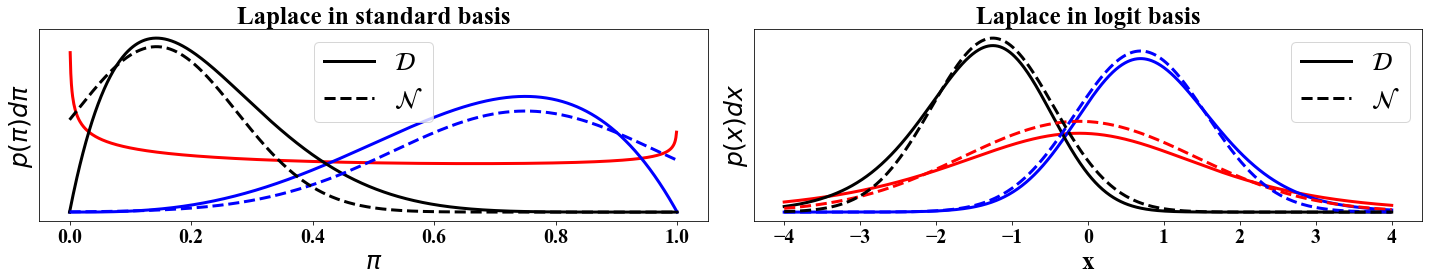

In [8]:
plot_beta_t_logit(params=[[0.8,0.9], [4,2,], [2, 7]], save=True, filename='beta_logit_bridge_wo_back.pdf', show_back=False)

# Verify the Bridge

In [30]:
def alpha_beta_from_normal(mu, sigma):
    a = (np.exp(mu) + 1)/sigma**2
    b = (np.exp(-mu) + 1)/sigma**2

    return(a, b)

test_a1, test_b1 = 3,4
test_m1, test_s1 = beta_t_logit_mu(test_a1, test_b1), np.sqrt(beta_t_logit_var(test_a1, test_b1))
test_a2, test_b2 = alpha_beta_from_normal(test_m1, test_s1)

print(test_a2, test_b2)

rand_a1, rand_b1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = beta_t_logit_mu(rand_a1, rand_b1), np.sqrt(beta_t_logit_var(rand_a1, rand_b1))
rand_a2, rand_b2 = alpha_beta_from_normal(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_b1, rand_b2))

3.0 3.999999999999999


# Statistical distance measures

In [31]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, beta
import torch

## MMD from 100 combinations of parameters

In [139]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    MMD_sum = 0
    MMD_t_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                break
            
            #get samples from all dists
            #standard
            B_samples = beta.rvs(a, b, size=n_samples)
            if a >= 1:                
                mode1 = beta_mu(a, b)
                sigma1 = np.sqrt(beta_var(a, b))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #logit
            mode1_logit = beta_t_logit_mu(a, b)
            sigma1_logit = np.sqrt(beta_t_logit_var(a, b))
            B_samples_logit = logit_transform(B_samples)
            N_samples_logit = norm.rvs(mode1_logit, sigma1_logit, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            B_samples_ = torch.Tensor(B_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(B_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
                MMD_ = torch.max(torch.zeros(1), MMD_)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #logit
            B_samples_logit_ = torch.Tensor(B_samples_logit.reshape((n_samples, -1)))
            N_samples_logit_ = torch.Tensor(N_samples_logit.reshape((n_samples, -1)))
            MMD_logit_= MMD(B_samples_logit_, N_samples_logit_,  alphas=[0.5], ret_matrix=False)
            MMD_logit_= torch.max(torch.zeros(1), MMD_logit_)
            

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(23, 6))
                axs[0].hist(B_samples, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(B_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[1].hist(N_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('logit basis')
                axs[1].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "logit: ", MMD_logit_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_logit_sum += MMD_logit_
            
    return(MMD_sum.item(), MMD_t_logit_sum.item())

a:  1.1 b:  1.1


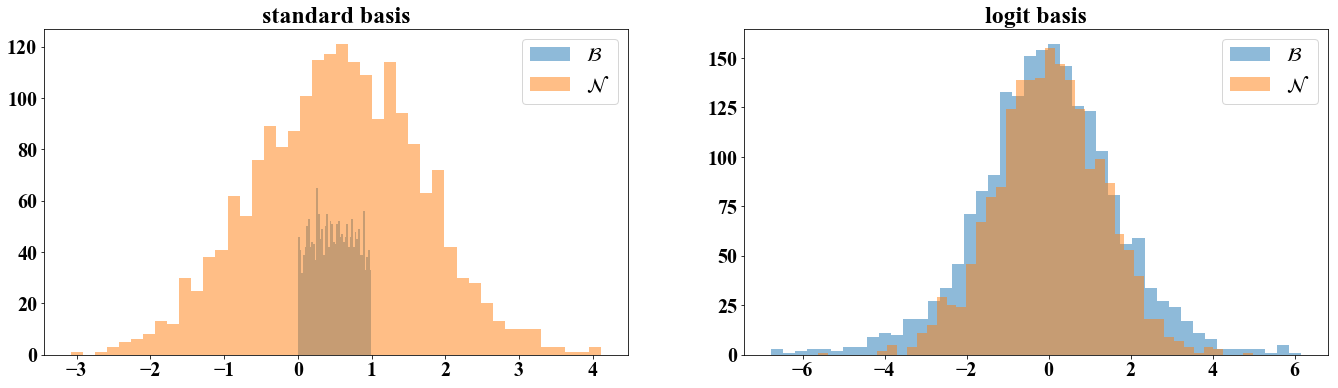

standard:  0.1555575728416443 logit:  0.006945371627807617
a:  1.1 b:  1.6


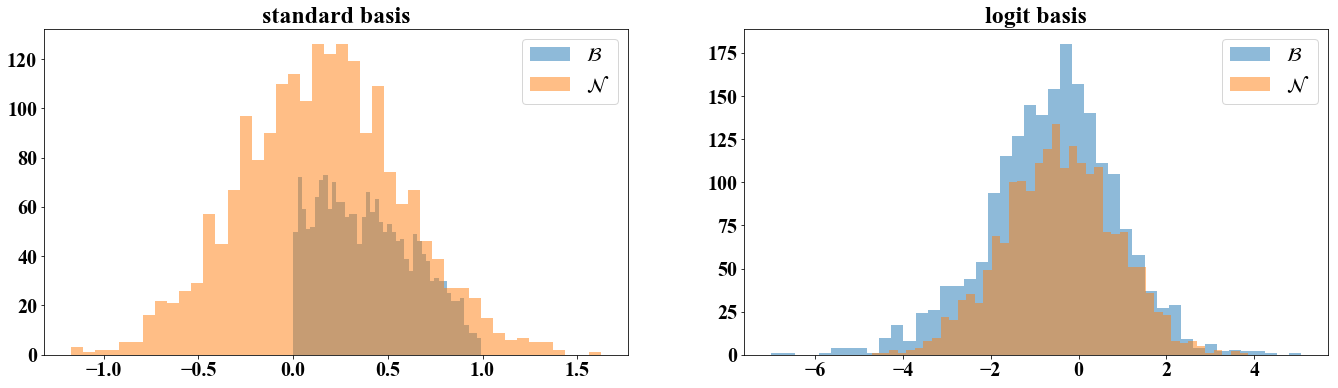

standard:  0.04955732822418213 logit:  0.002117156982421875
a:  1.1 b:  2.1


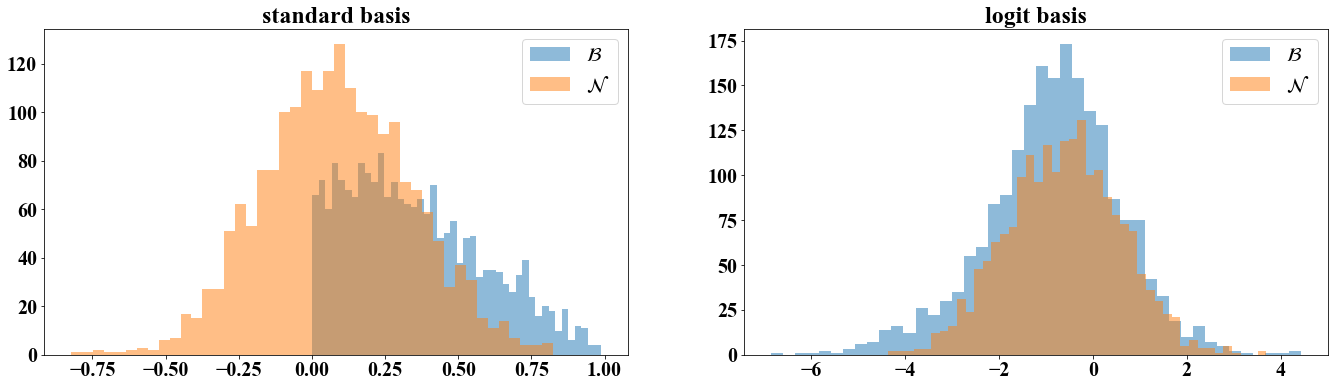

standard:  0.0575602650642395 logit:  0.0034897327423095703
a:  1.1 b:  2.6


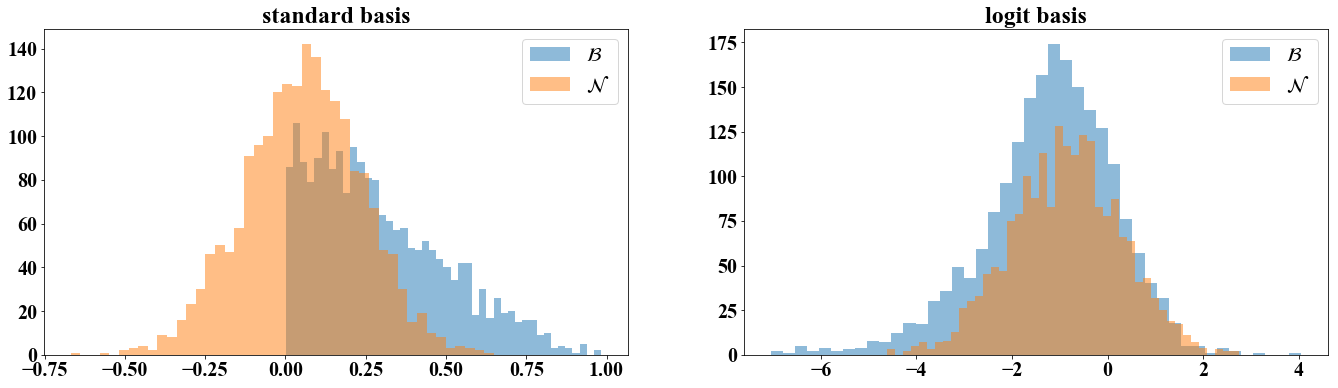

standard:  0.048217058181762695 logit:  0.006917476654052734
a:  1.1 b:  3.1


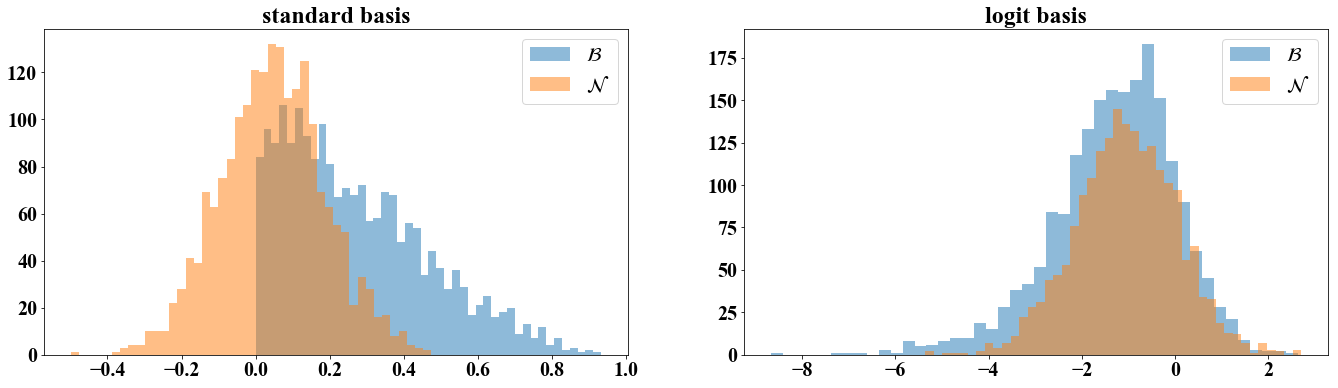

standard:  0.04560196399688721 logit:  0.005878925323486328
a:  1.1 b:  3.6


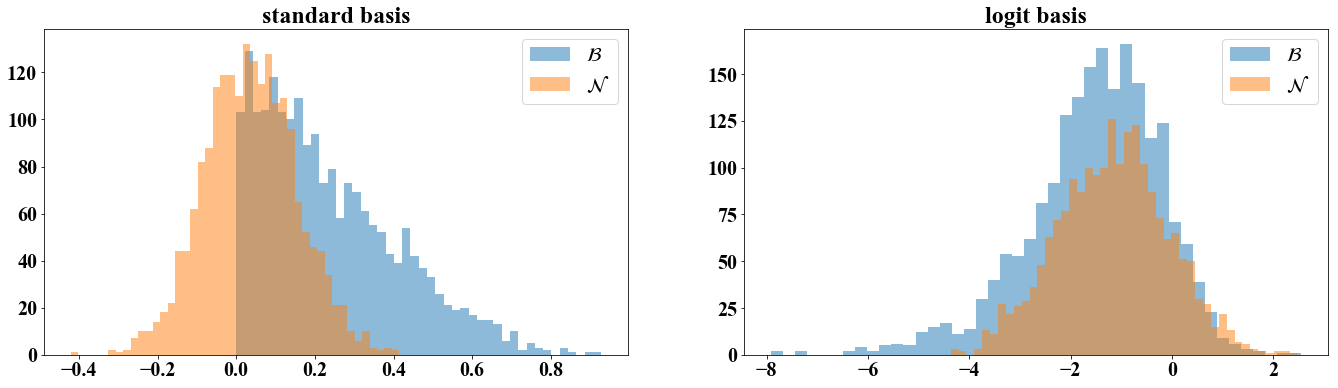

standard:  0.03730583190917969 logit:  0.008105635643005371
a:  1.1 b:  4.1


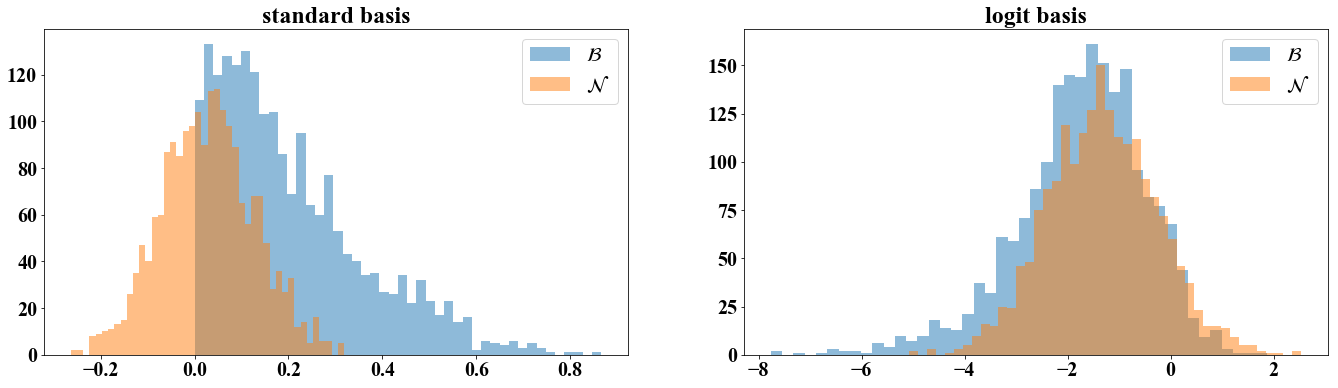

standard:  0.02839827537536621 logit:  0.012538492679595947
a:  1.1 b:  4.6


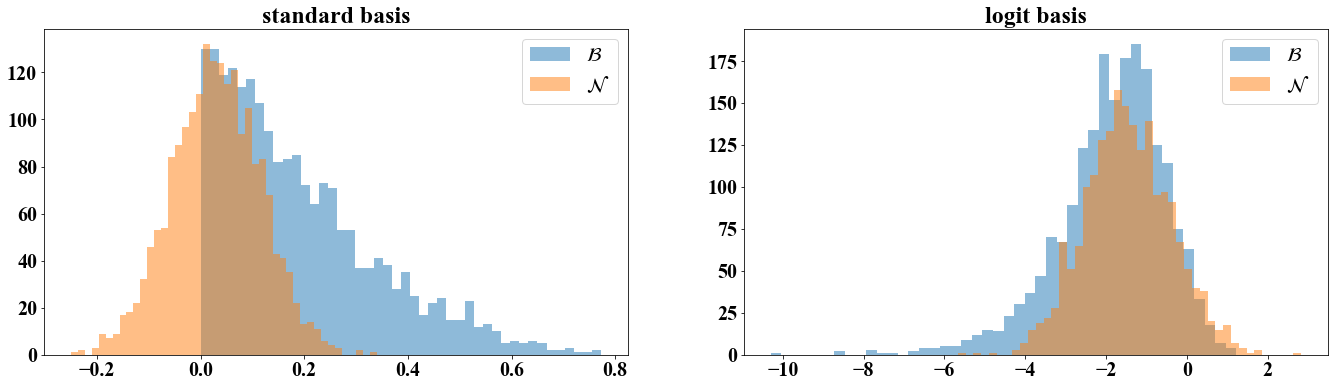

standard:  0.024369418621063232 logit:  0.010324478149414062
a:  1.6 b:  1.1


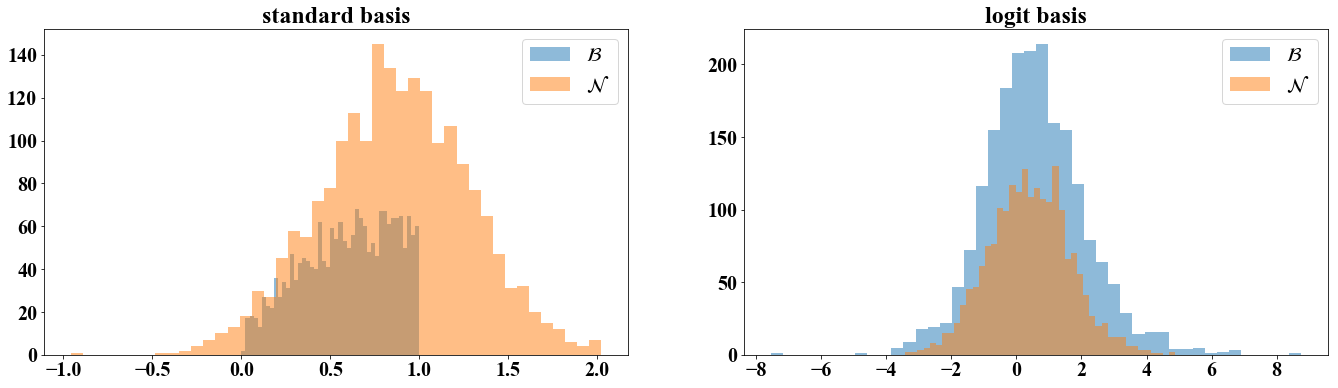

standard:  0.05550152063369751 logit:  0.0045191943645477295
a:  1.6 b:  1.6


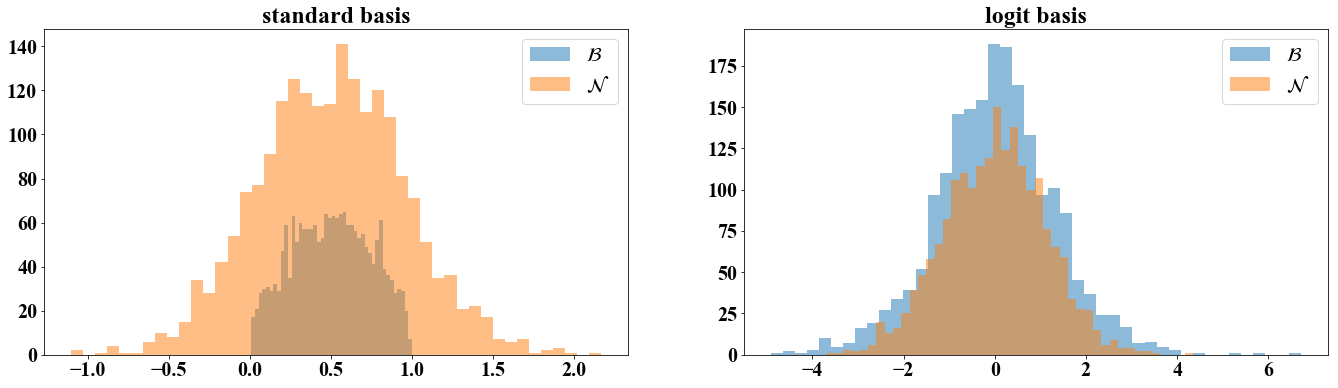

standard:  0.008643388748168945 logit:  0.0021879076957702637
a:  1.6 b:  2.1


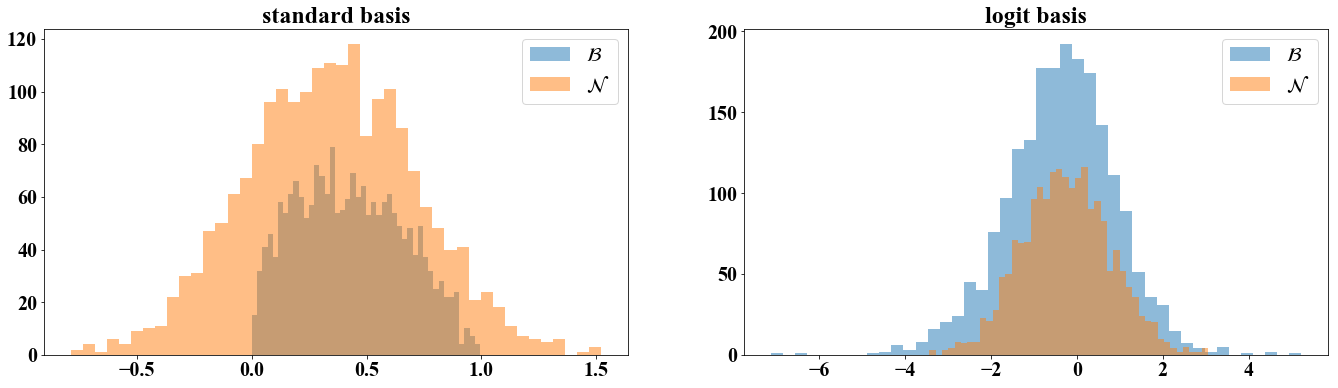

standard:  0.008821666240692139 logit:  0.005227625370025635
a:  1.6 b:  2.6


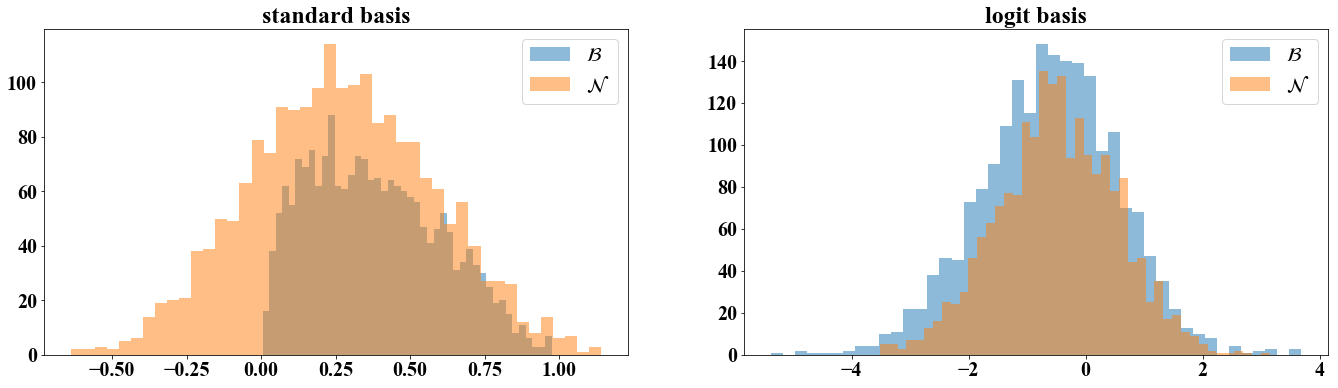

standard:  0.011364340782165527 logit:  0.004441618919372559
a:  1.6 b:  3.1


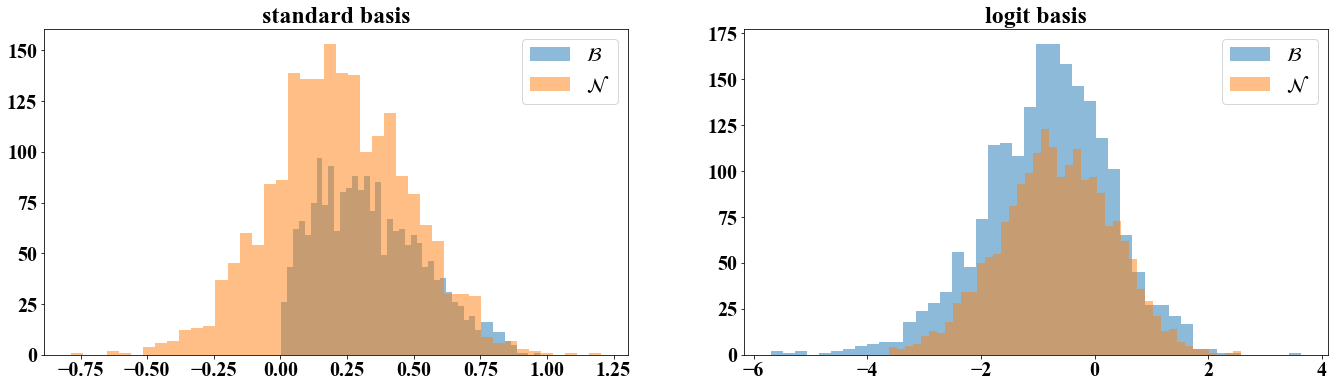

standard:  0.012206494808197021 logit:  0.0032026171684265137
a:  1.6 b:  3.6


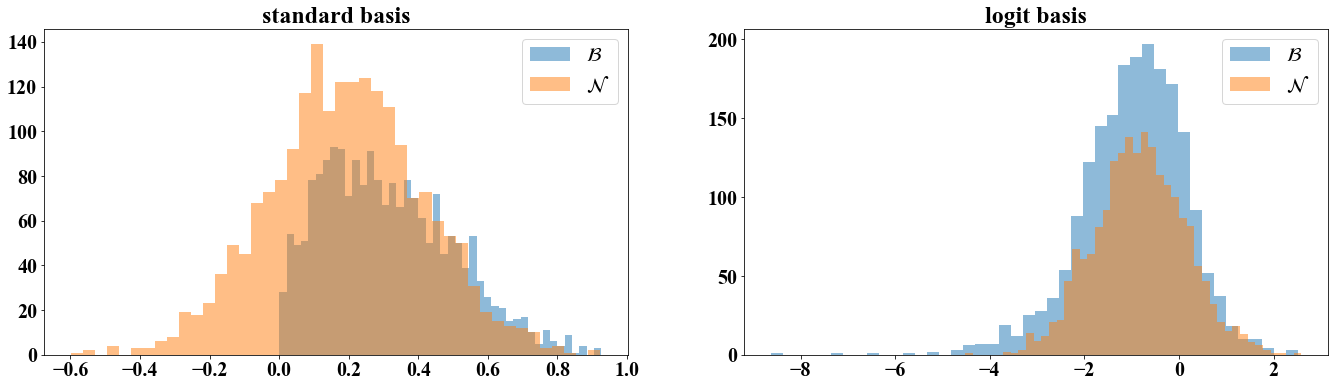

standard:  0.013017714023590088 logit:  0.0018008947372436523
a:  1.6 b:  4.1


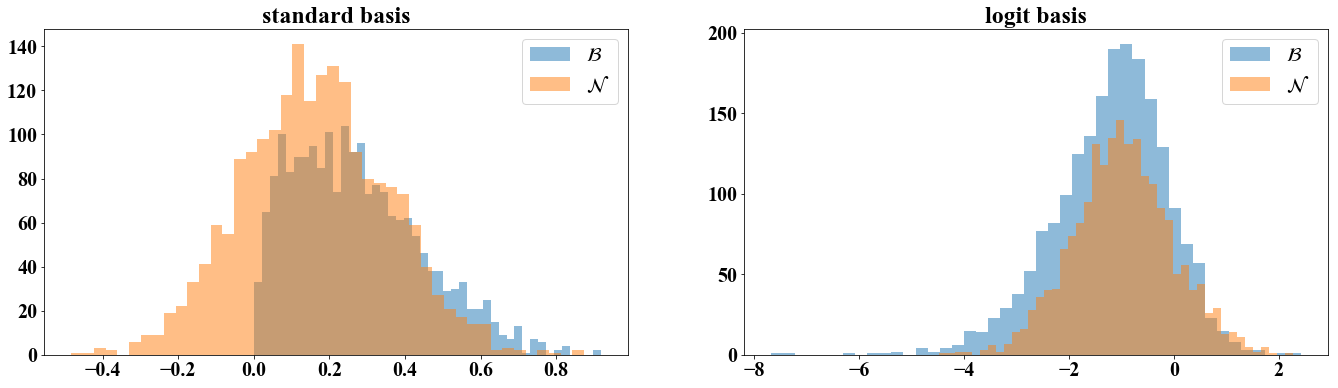

standard:  0.011105954647064209 logit:  0.005292296409606934
a:  1.6 b:  4.6


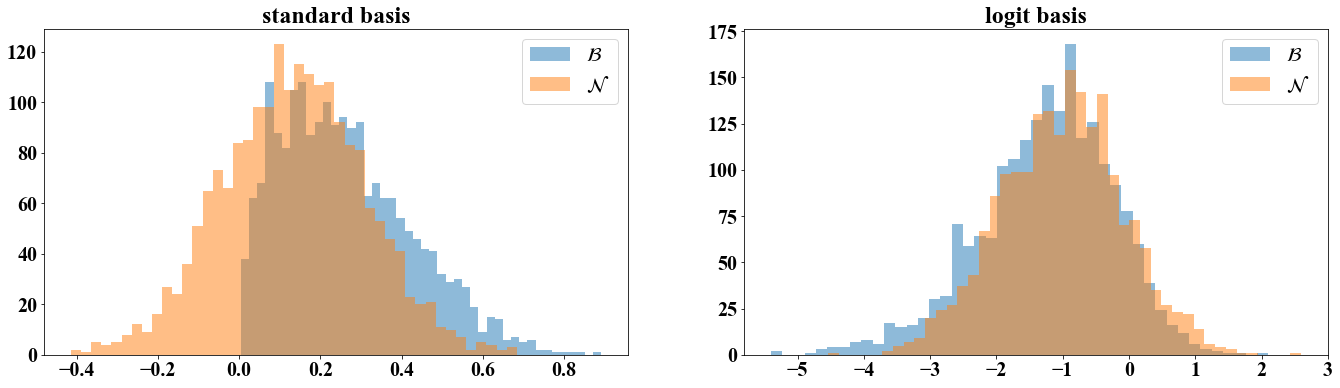

standard:  0.014991044998168945 logit:  0.005827546119689941
a:  2.1 b:  1.1


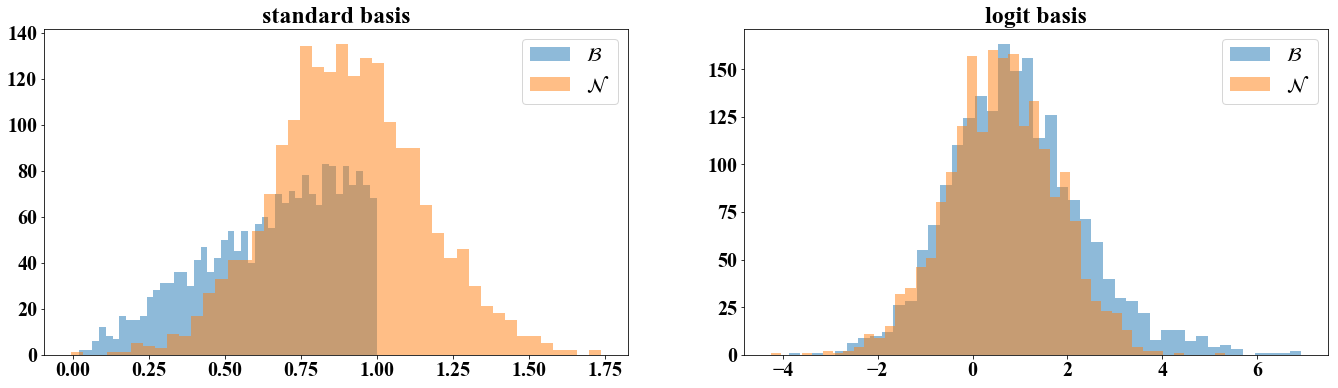

standard:  0.04857051372528076 logit:  0.00851750373840332
a:  2.1 b:  1.6


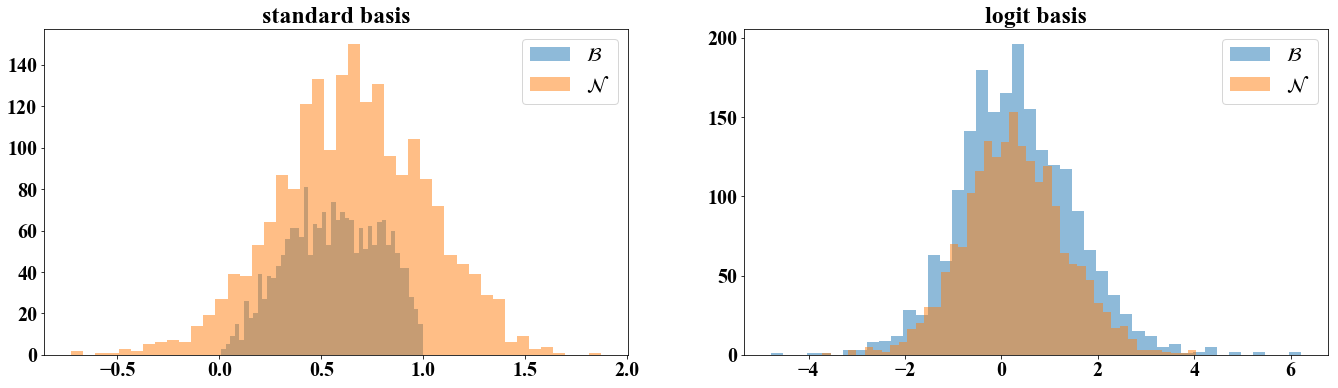

standard:  0.009777367115020752 logit:  0.0020848512649536133
a:  2.1 b:  2.1


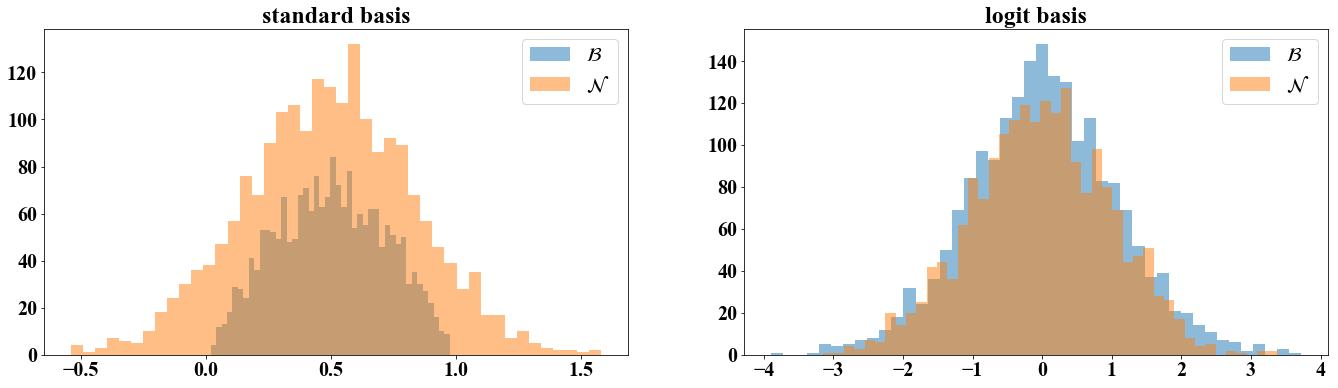

standard:  0.0022203922271728516 logit:  5.8531761169433594e-05
a:  2.1 b:  2.6


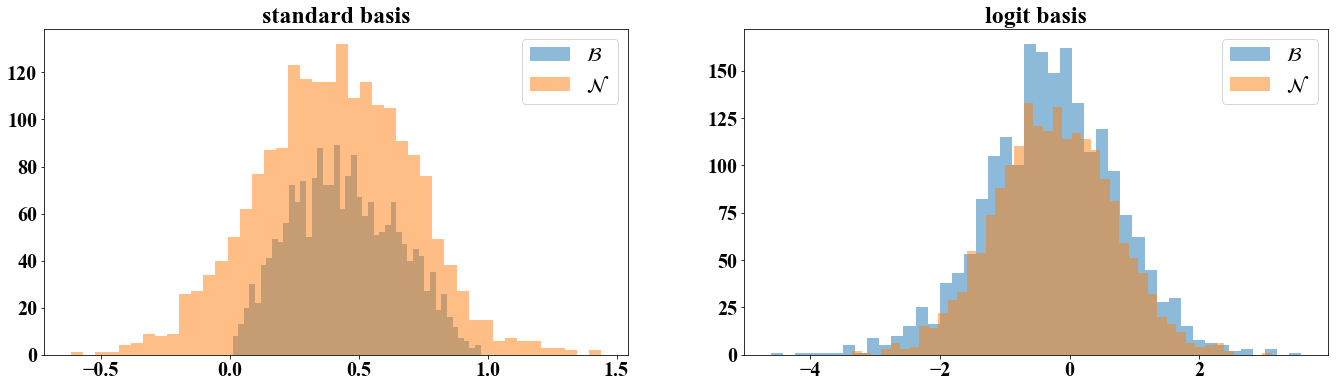

standard:  0.0021821260452270508 logit:  0.0009627342224121094
a:  2.1 b:  3.1


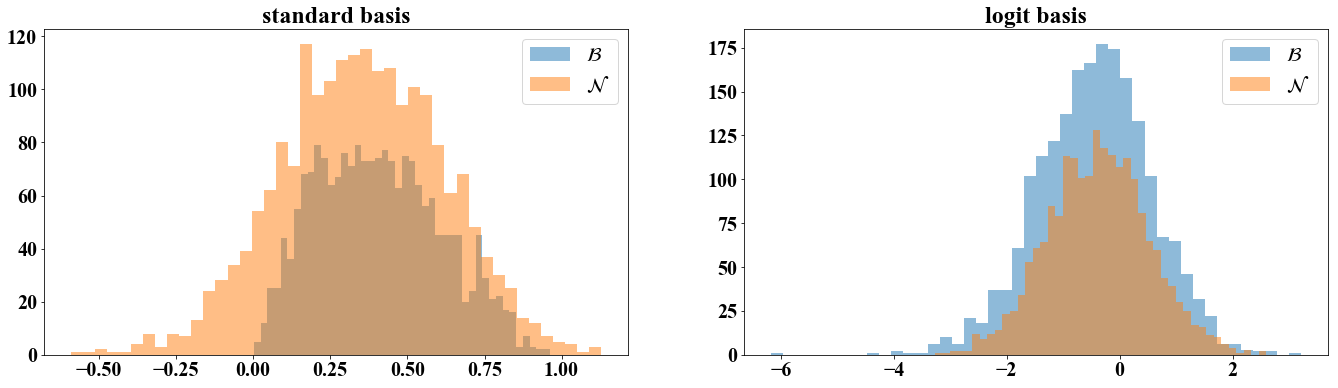

standard:  0.0029587149620056152 logit:  0.001898646354675293
a:  2.1 b:  3.6


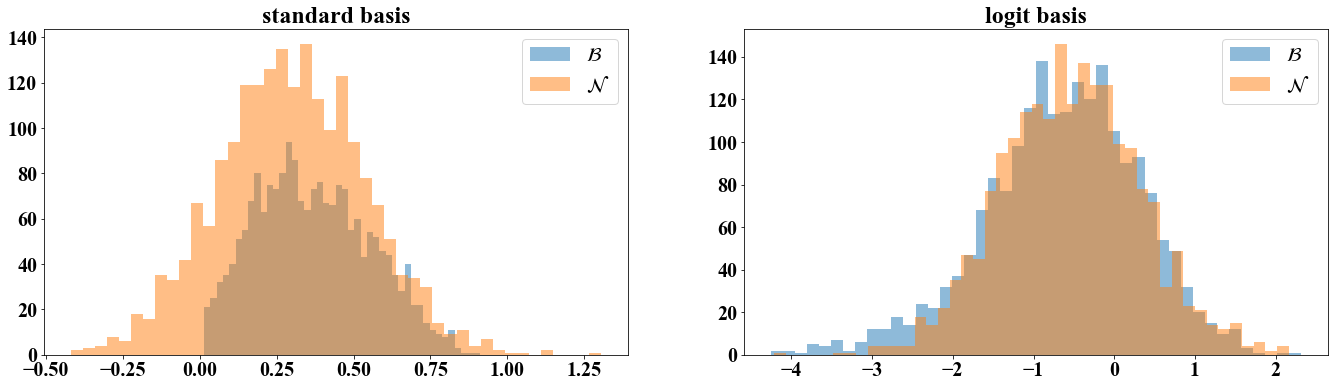

standard:  0.004618644714355469 logit:  0.0017974376678466797
a:  2.1 b:  4.1


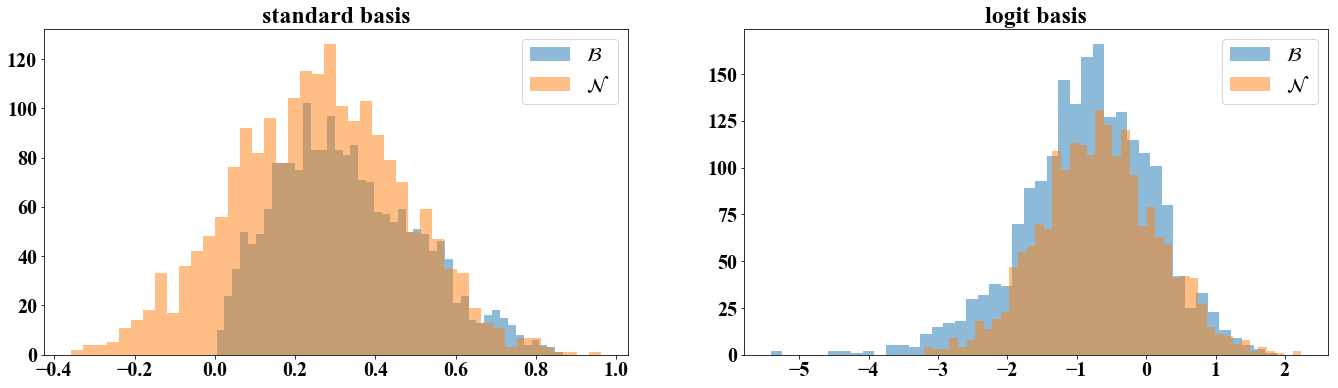

standard:  0.005168259143829346 logit:  0.0036029815673828125
a:  2.1 b:  4.6


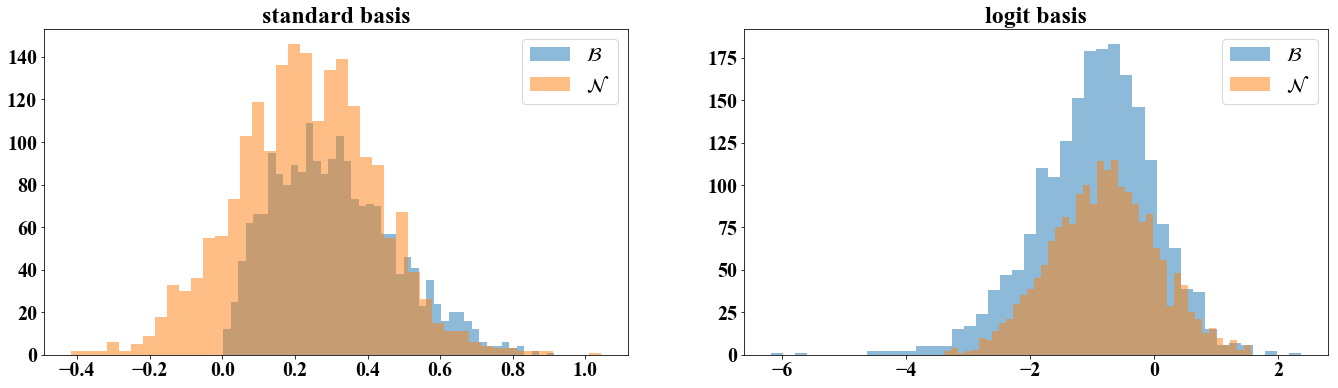

standard:  0.005605101585388184 logit:  0.0028024911880493164
a:  2.6 b:  1.1


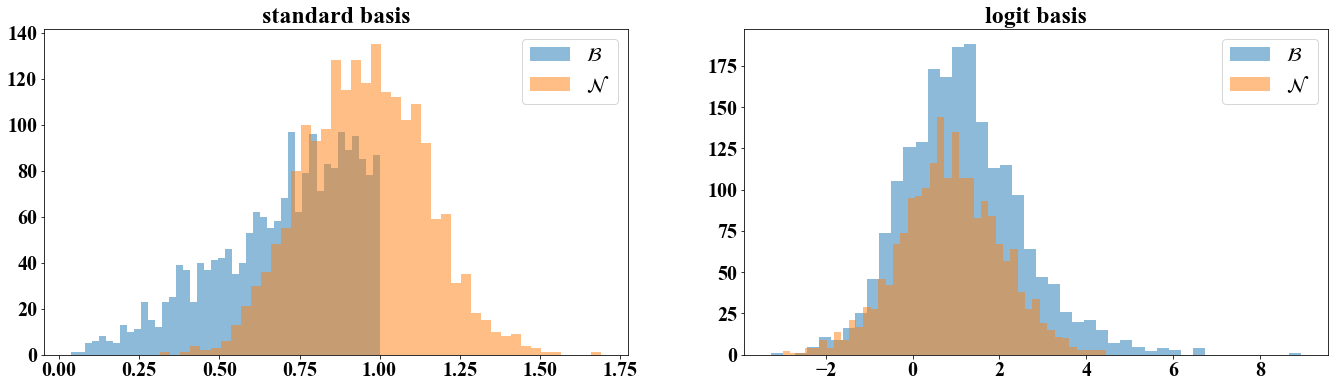

standard:  0.053751587867736816 logit:  0.0061501264572143555
a:  2.6 b:  1.6


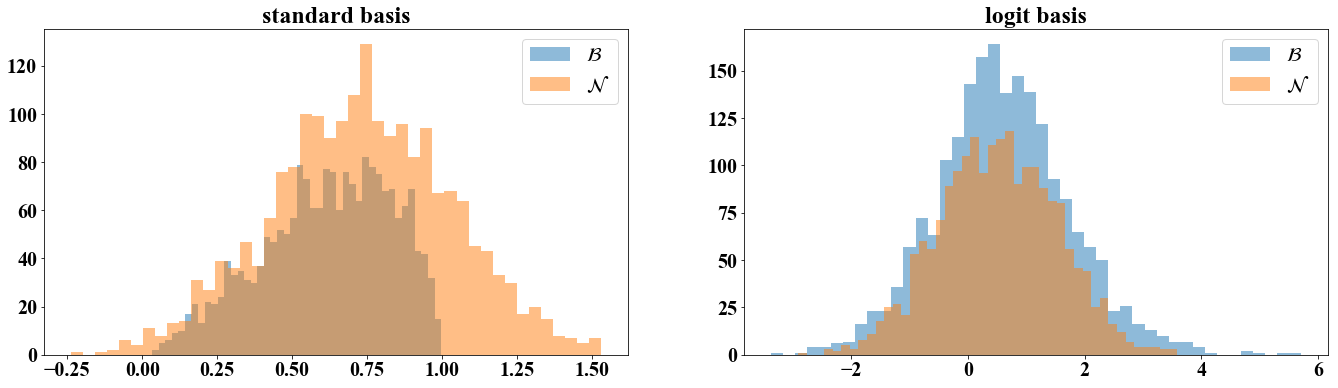

standard:  0.01108485460281372 logit:  0.0013179779052734375
a:  2.6 b:  2.1


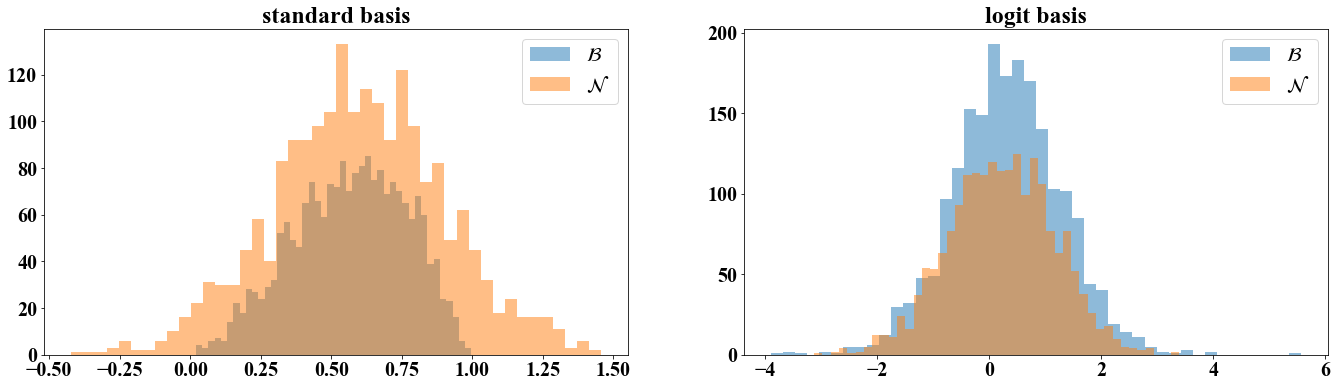

standard:  0.0021328330039978027 logit:  0.0014153718948364258
a:  2.6 b:  2.6


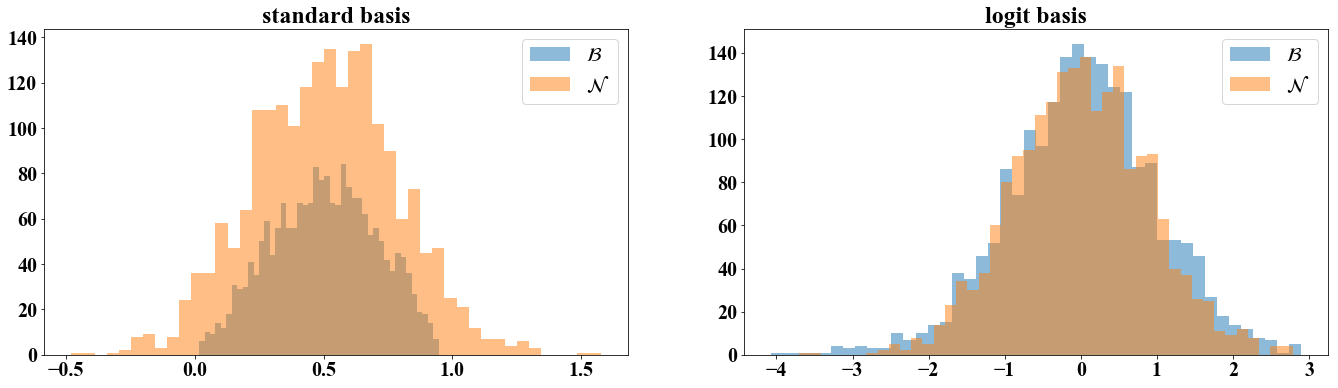

standard:  0.0007029175758361816 logit:  0.000955045223236084
a:  2.6 b:  3.1


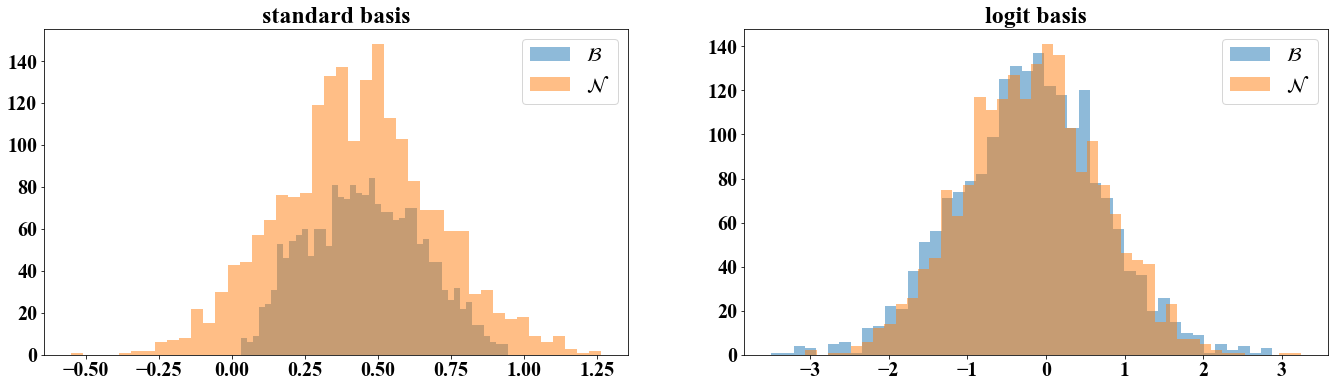

standard:  0.0012497305870056152 logit:  0.00020194053649902344
a:  2.6 b:  3.6


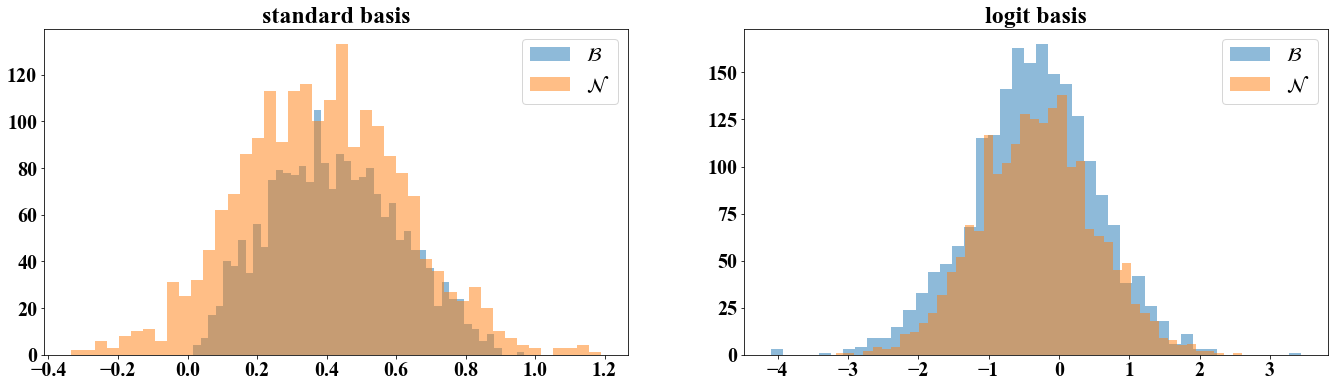

standard:  0.0016562938690185547 logit:  0.00042498111724853516
a:  2.6 b:  4.1


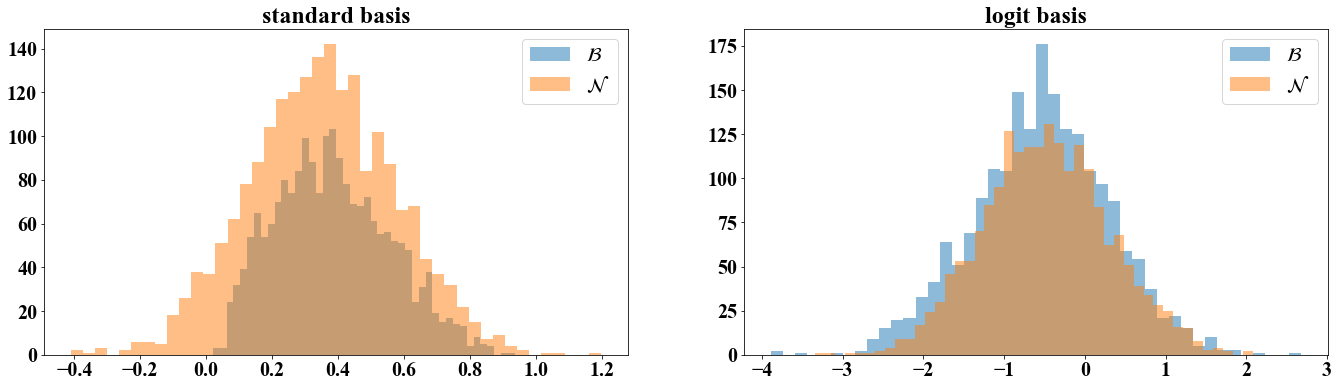

standard:  0.0011862516403198242 logit:  0.0009034872055053711
a:  2.6 b:  4.6


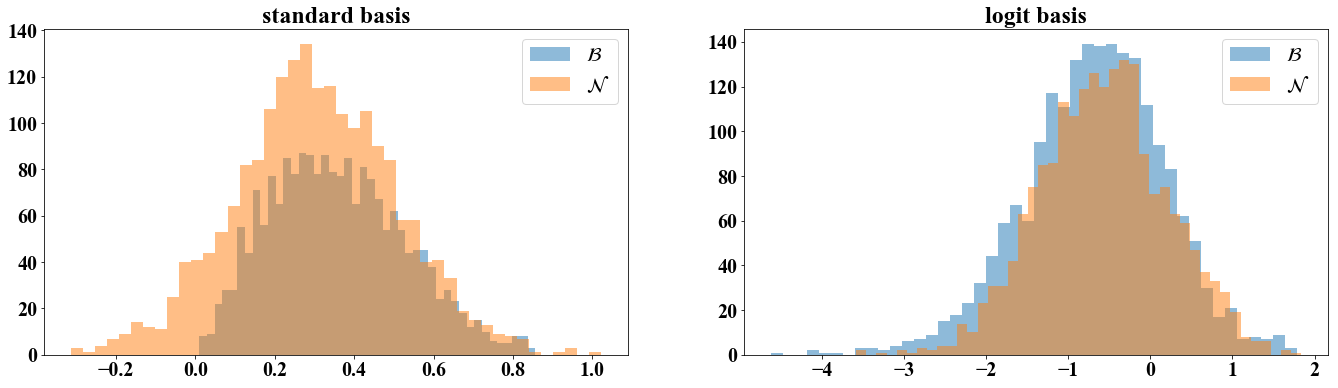

standard:  0.002747774124145508 logit:  0.002062082290649414
a:  3.1 b:  1.1


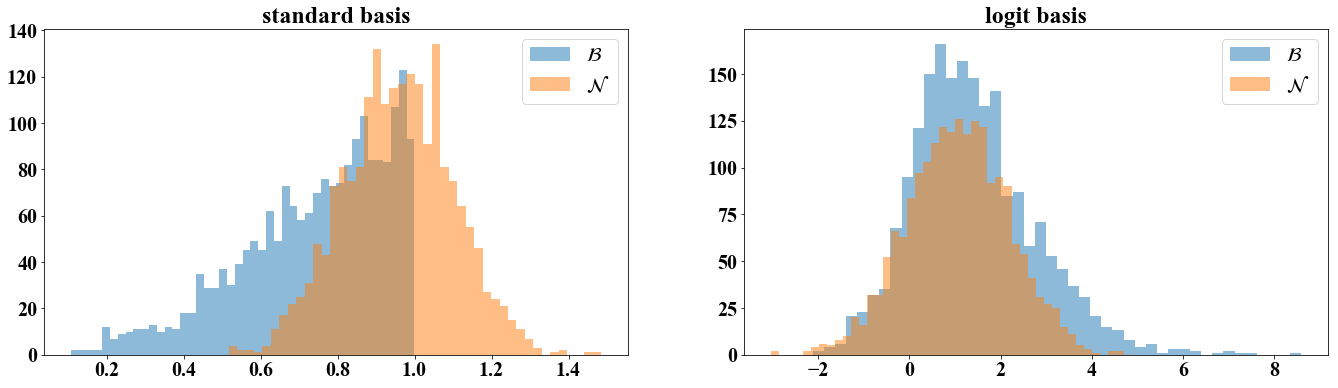

standard:  0.042490482330322266 logit:  0.008502721786499023
a:  3.1 b:  1.6


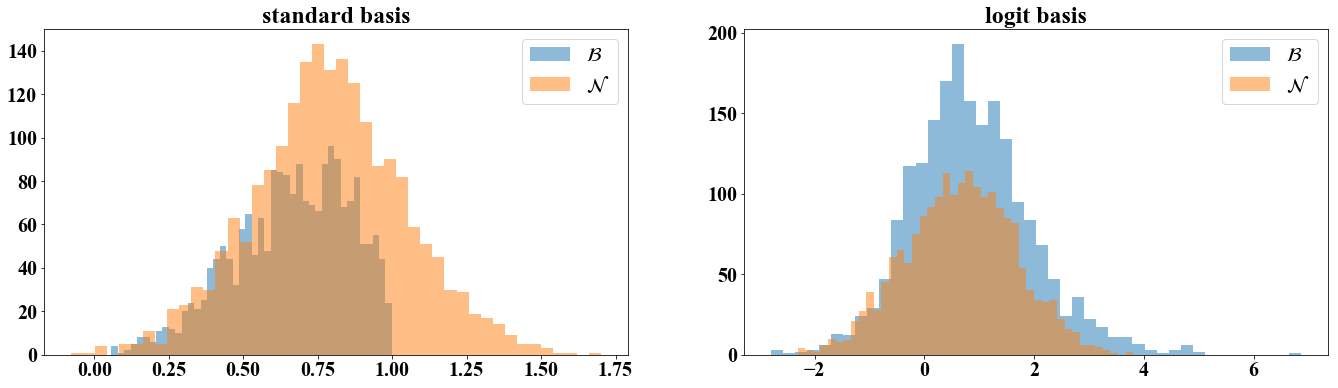

standard:  0.01360231637954712 logit:  0.0027761459350585938
a:  3.1 b:  2.1


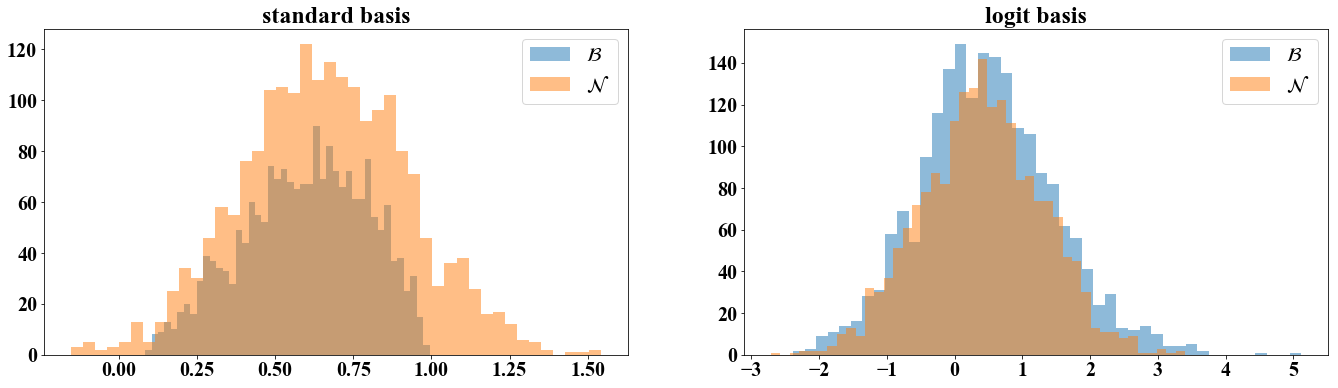

standard:  0.003962814807891846 logit:  0.0012278556823730469
a:  3.1 b:  2.6


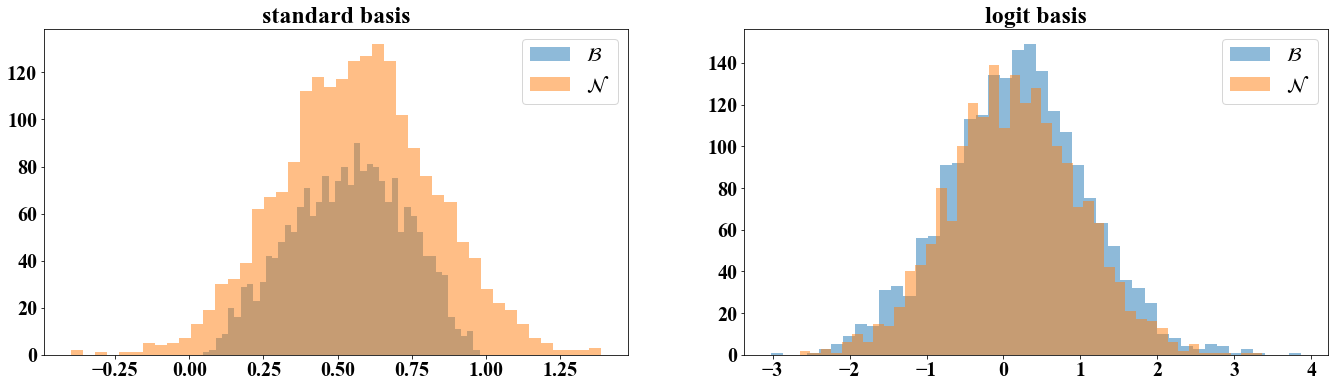

standard:  0.0011173486709594727 logit:  0.0005494356155395508
a:  3.1 b:  3.1


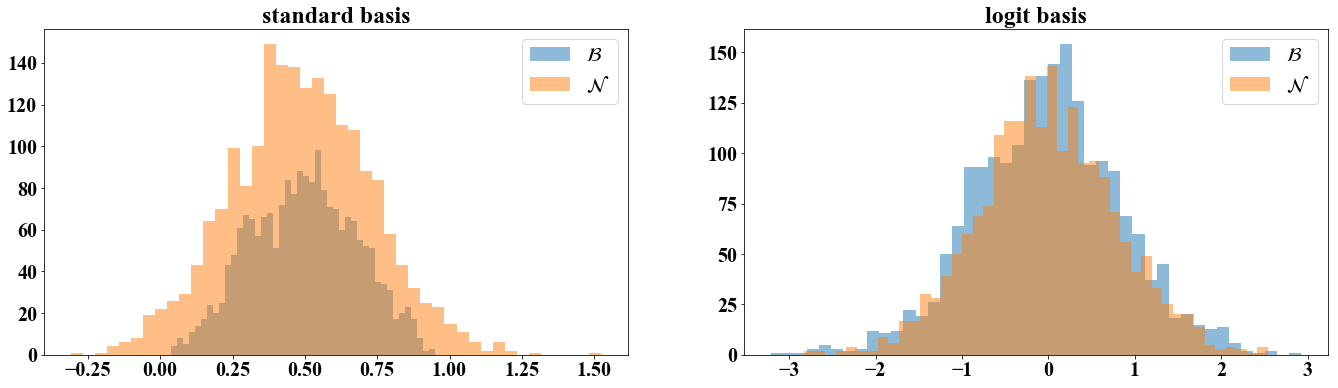

standard:  0.0004557967185974121 logit:  0.00019407272338867188
a:  3.1 b:  3.6


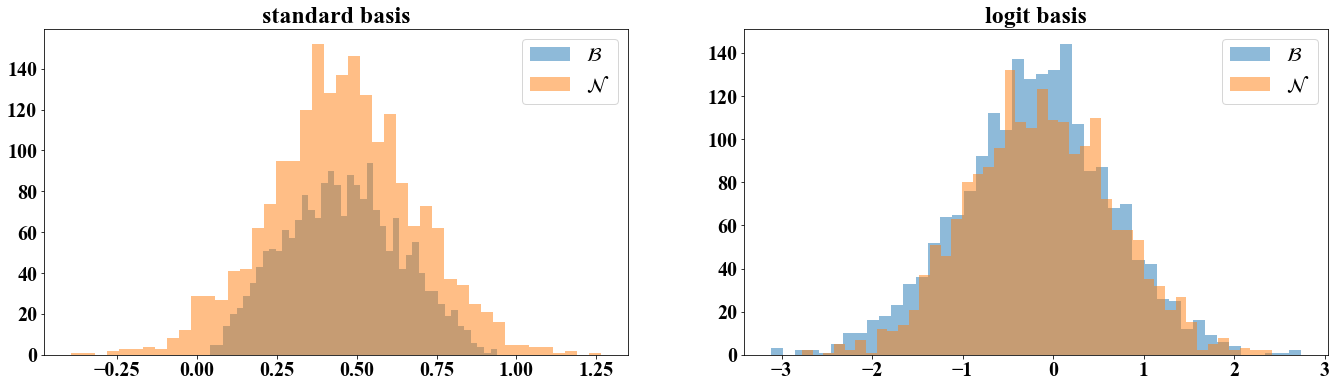

standard:  0.00019353628158569336 logit:  0.0005158185958862305
a:  3.1 b:  4.1


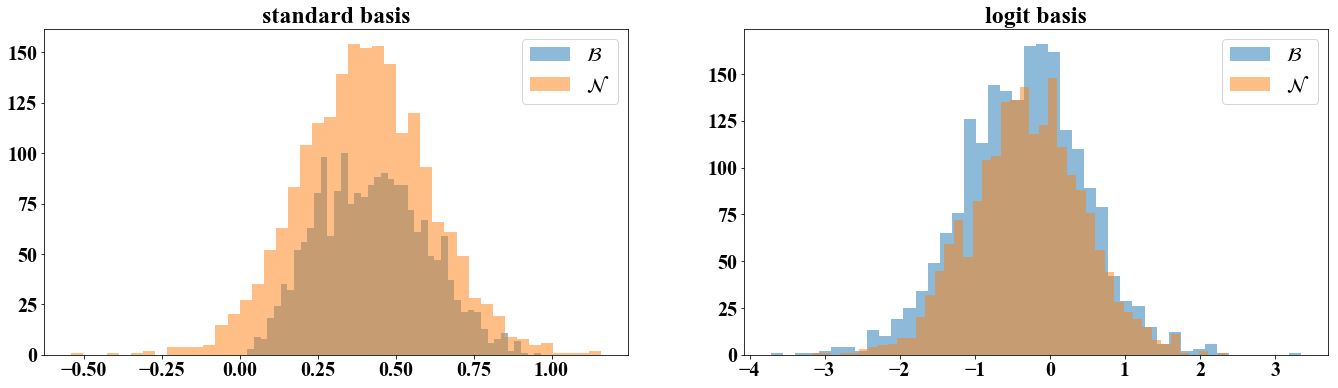

standard:  0.0007237792015075684 logit:  0.0011134743690490723
a:  3.1 b:  4.6


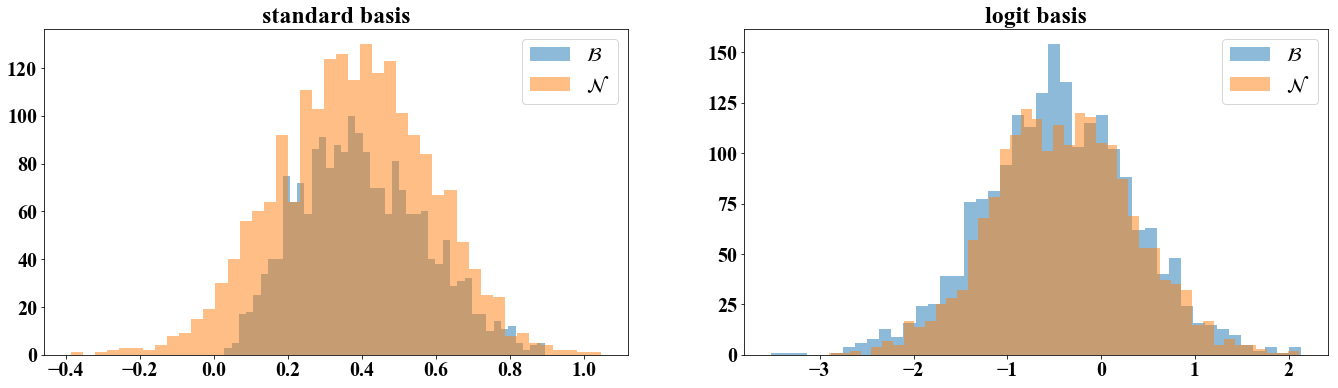

standard:  0.0005949735641479492 logit:  0.0005615353584289551
a:  3.6 b:  1.1


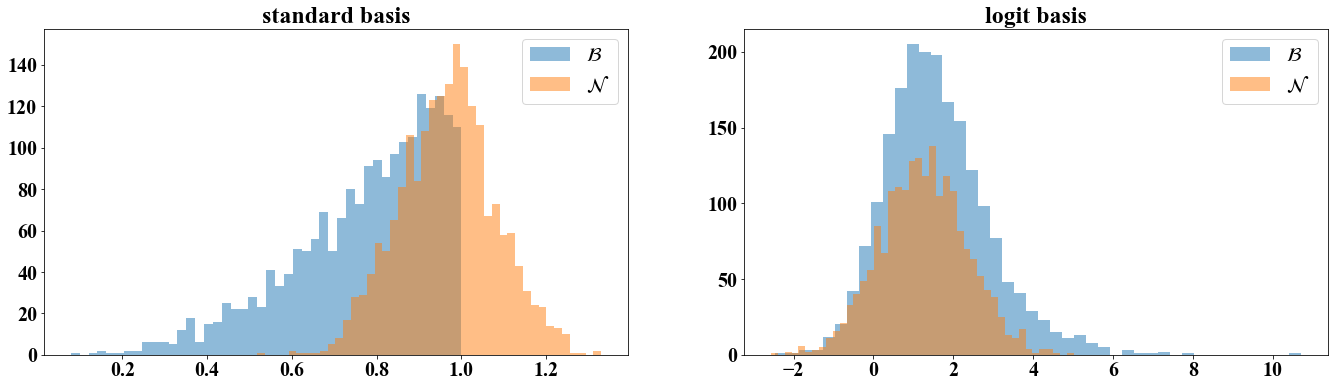

standard:  0.03490322828292847 logit:  0.008204162120819092
a:  3.6 b:  1.6


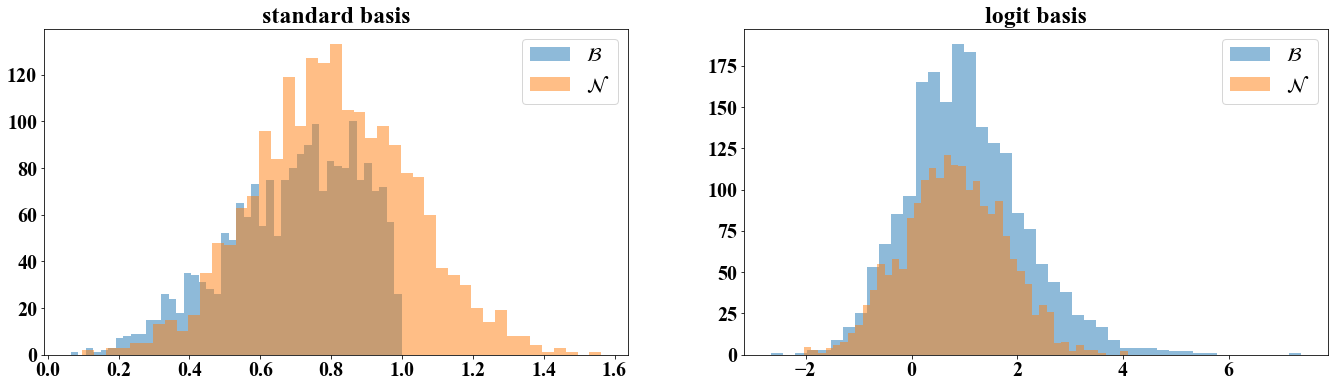

standard:  0.010851562023162842 logit:  0.005725443363189697
a:  3.6 b:  2.1


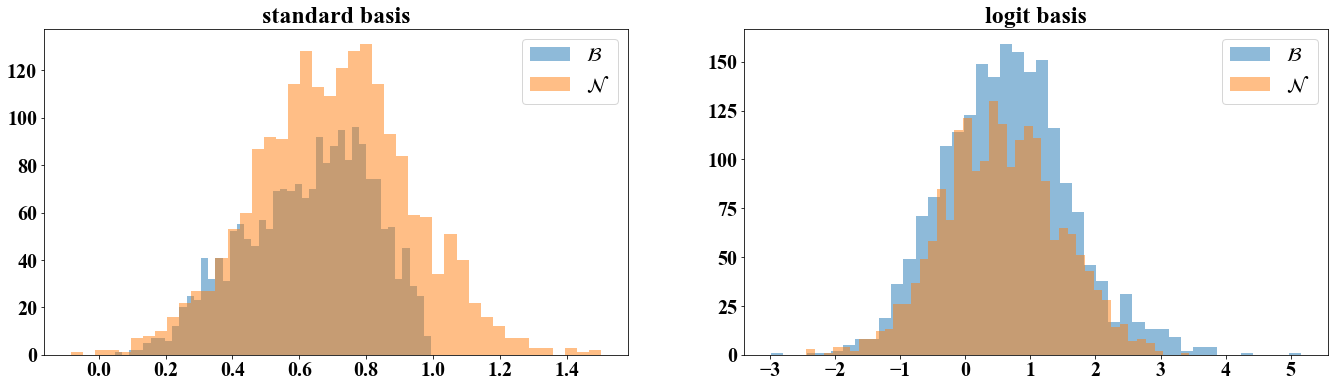

standard:  0.004722118377685547 logit:  0.0008726716041564941
a:  3.6 b:  2.6


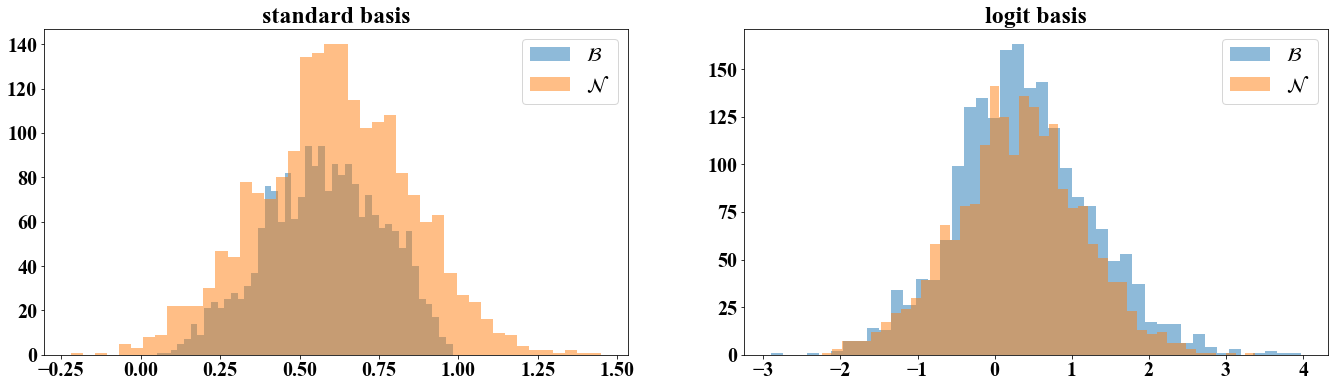

standard:  0.0011875629425048828 logit:  0.0005803704261779785
a:  3.6 b:  3.1


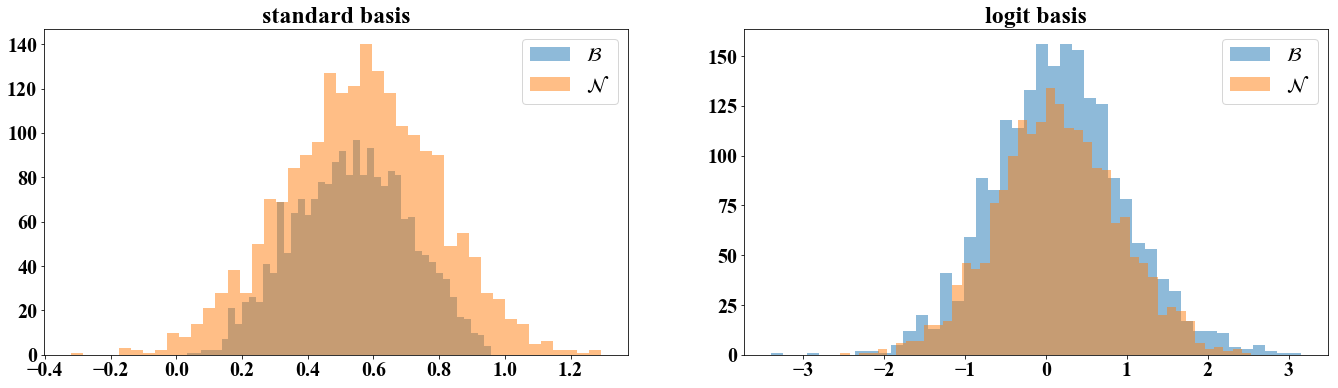

standard:  0.0007793307304382324 logit:  0.0001875758171081543
a:  3.6 b:  3.6


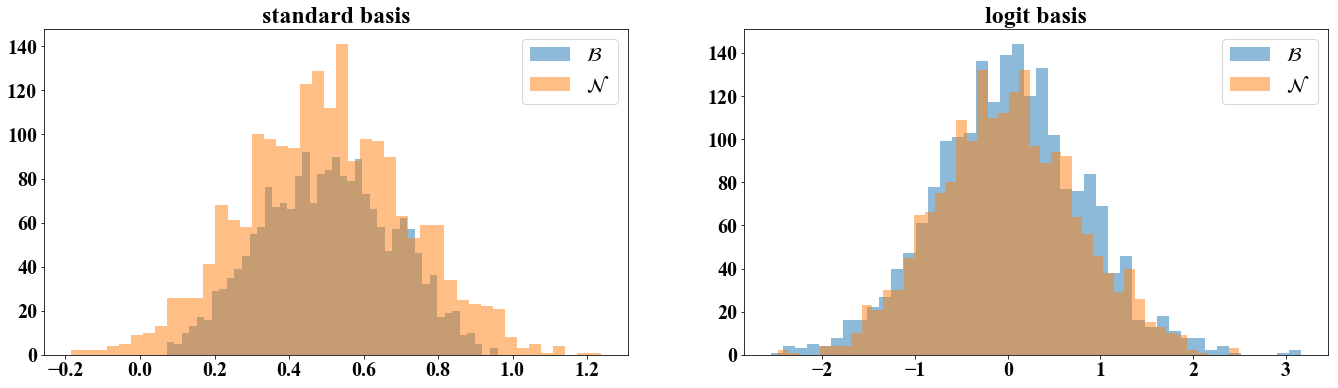

standard:  0.00017565488815307617 logit:  0.00019359588623046875
a:  3.6 b:  4.1


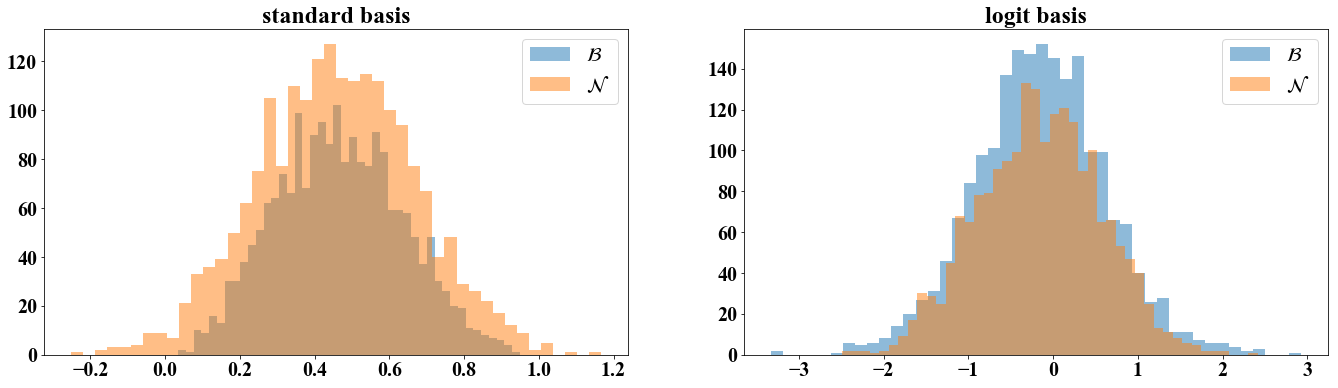

standard:  0.00014603137969970703 logit:  0.0
a:  3.6 b:  4.6


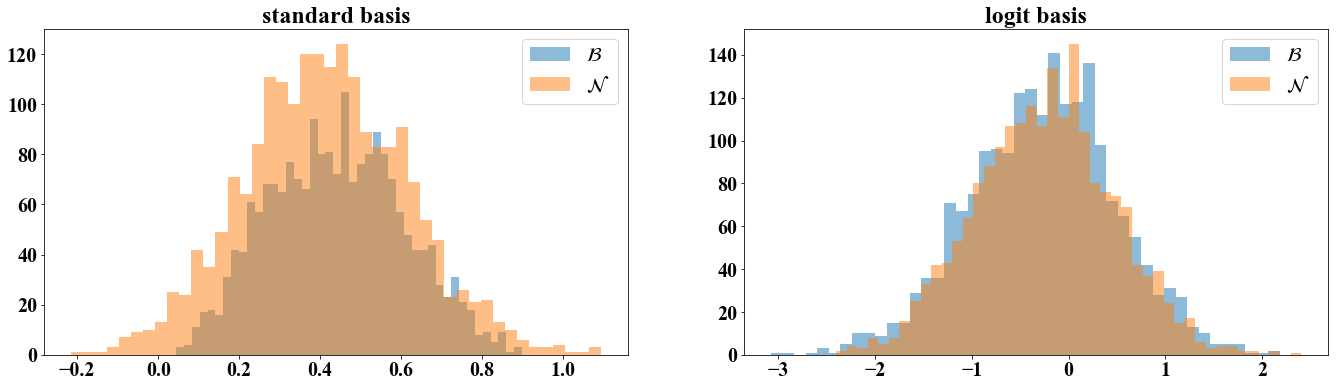

standard:  0.0007990002632141113 logit:  0.00013059377670288086
a:  4.1 b:  1.1


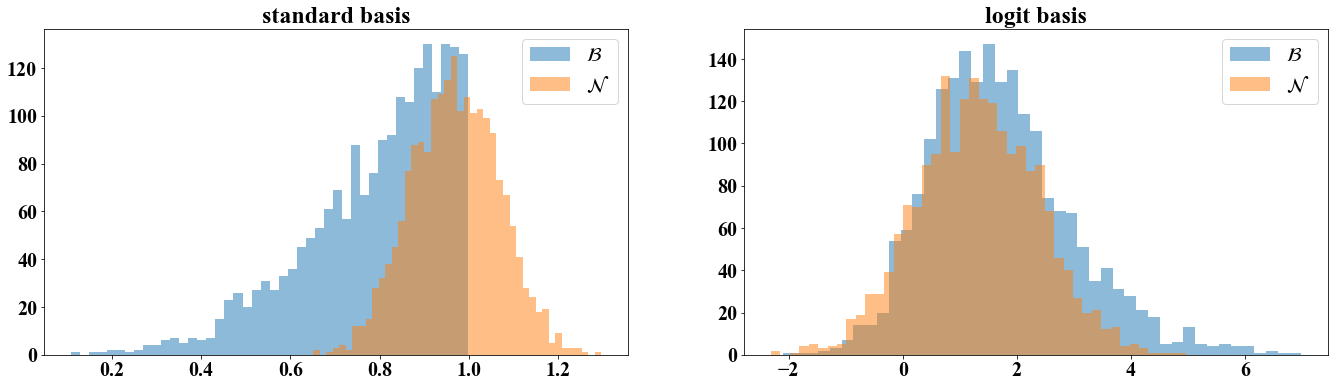

standard:  0.029675066471099854 logit:  0.011818885803222656
a:  4.1 b:  1.6


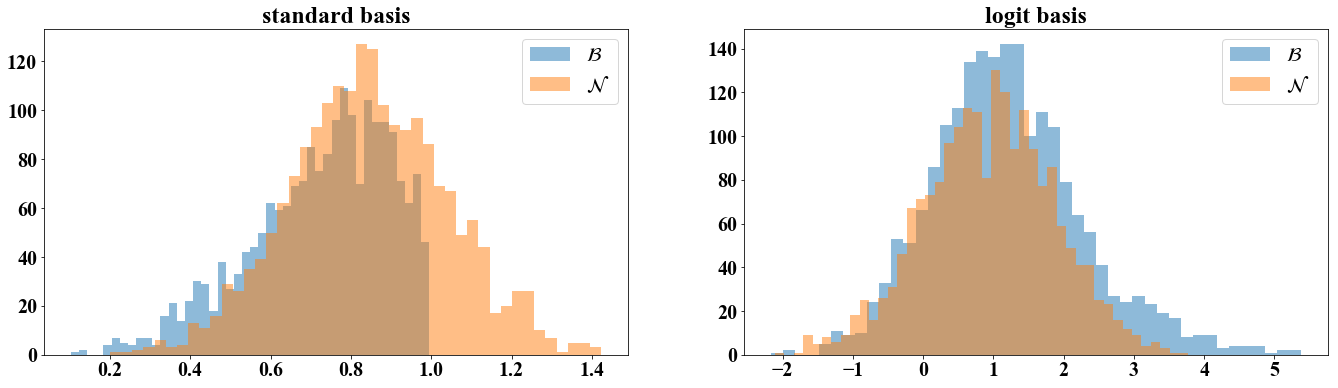

standard:  0.012423038482666016 logit:  0.007006585597991943
a:  4.1 b:  2.1


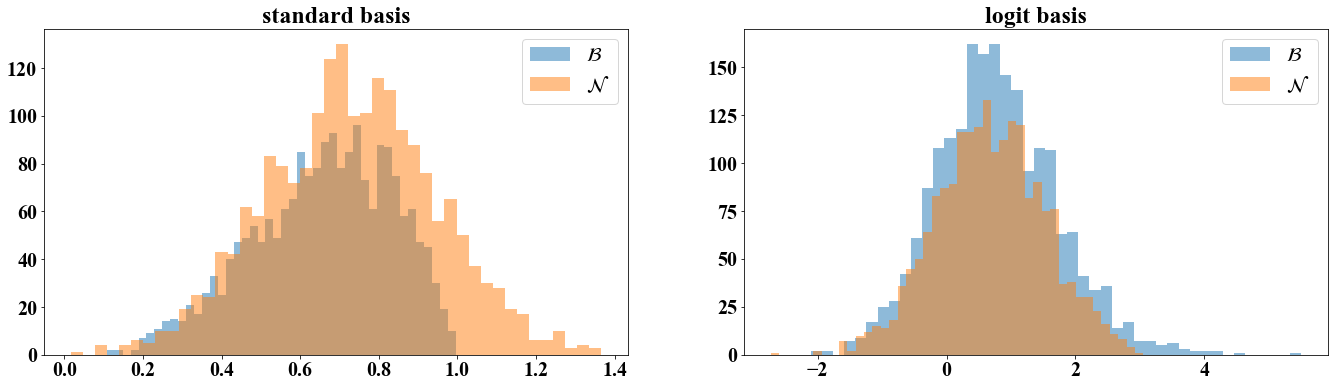

standard:  0.004639327526092529 logit:  0.0013006329536437988
a:  4.1 b:  2.6


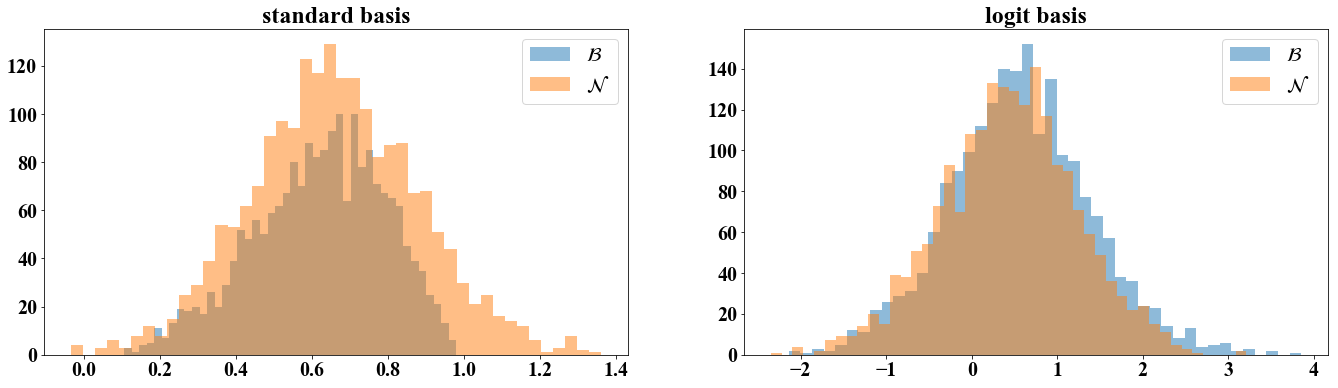

standard:  0.0013451576232910156 logit:  0.0031771063804626465
a:  4.1 b:  3.1


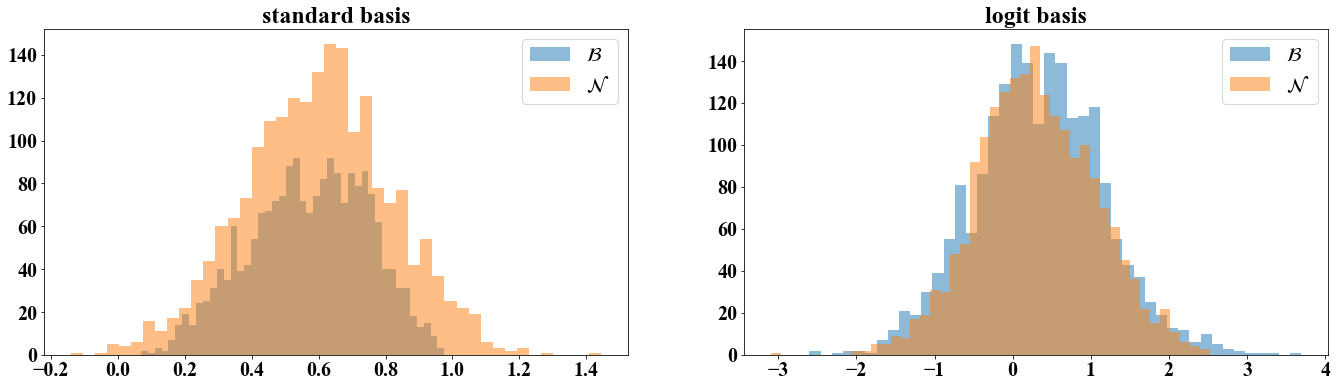

standard:  0.0007176995277404785 logit:  0.0007399916648864746
a:  4.1 b:  3.6


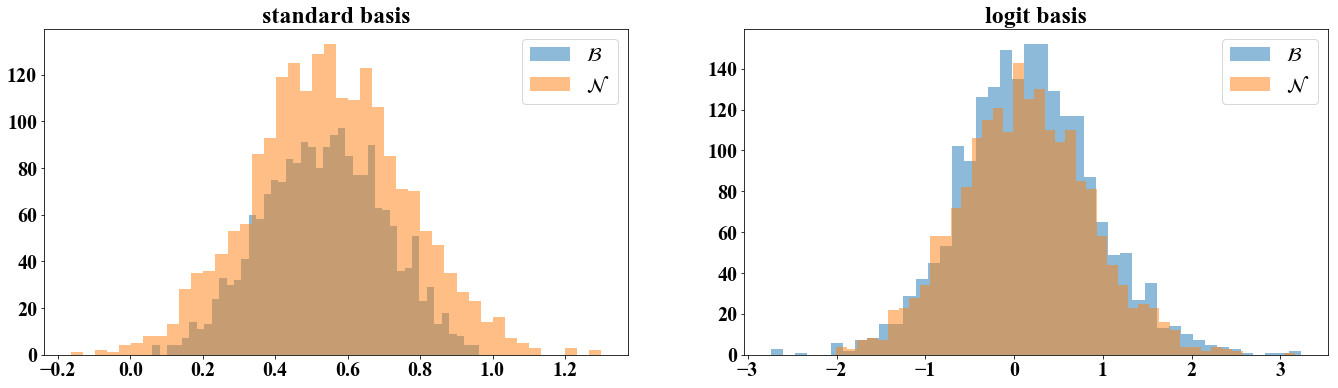

standard:  0.0003324747085571289 logit:  6.645917892456055e-05
a:  4.1 b:  4.1


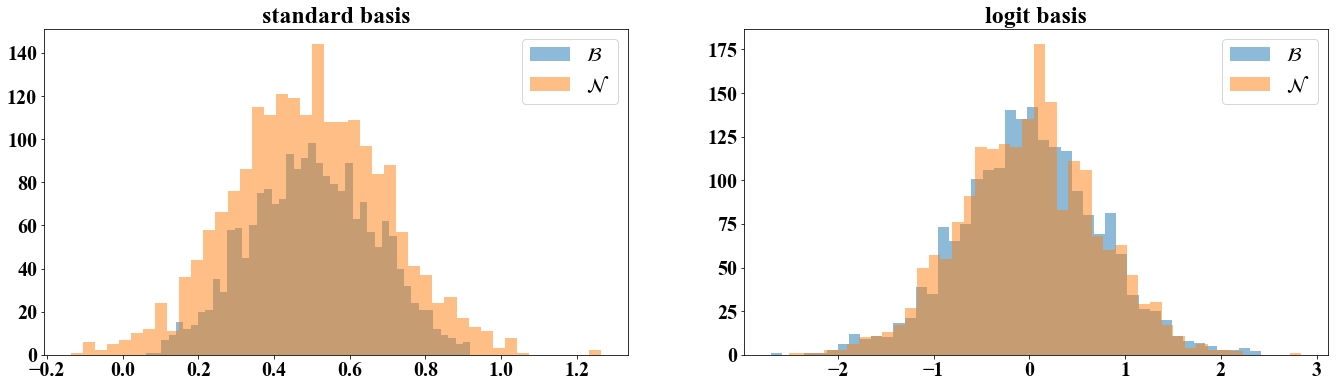

standard:  0.00016558170318603516 logit:  0.0
a:  4.1 b:  4.6


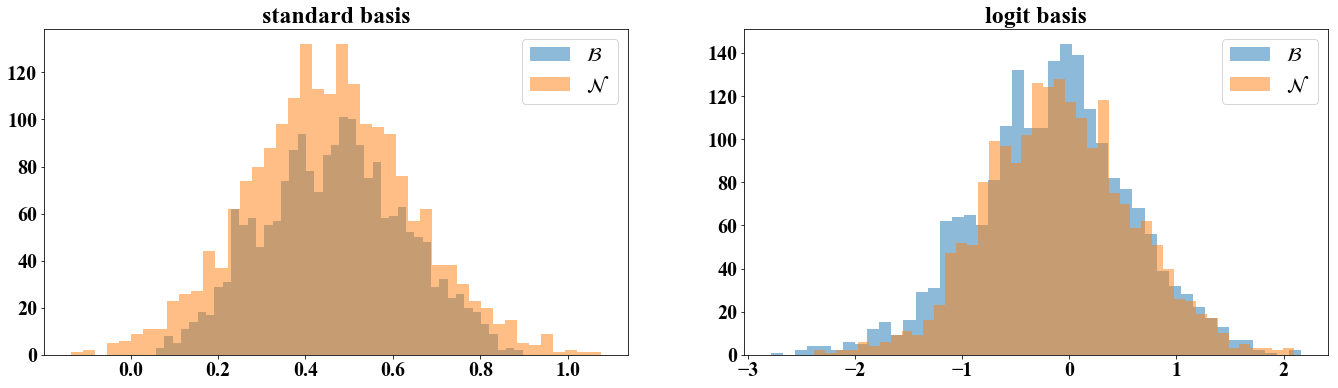

standard:  0.0001494884490966797 logit:  0.0011152029037475586
a:  4.6 b:  1.1


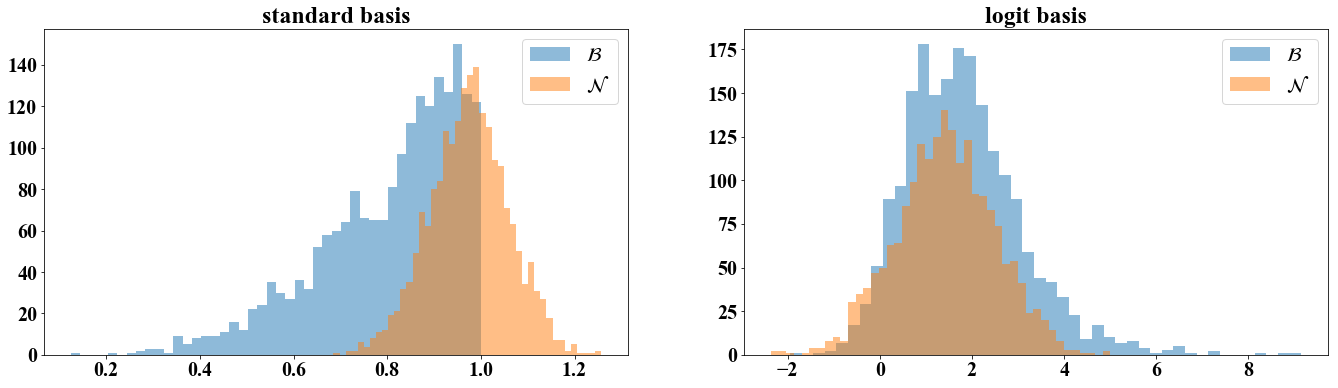

standard:  0.027073025703430176 logit:  0.008862137794494629
a:  4.6 b:  1.6


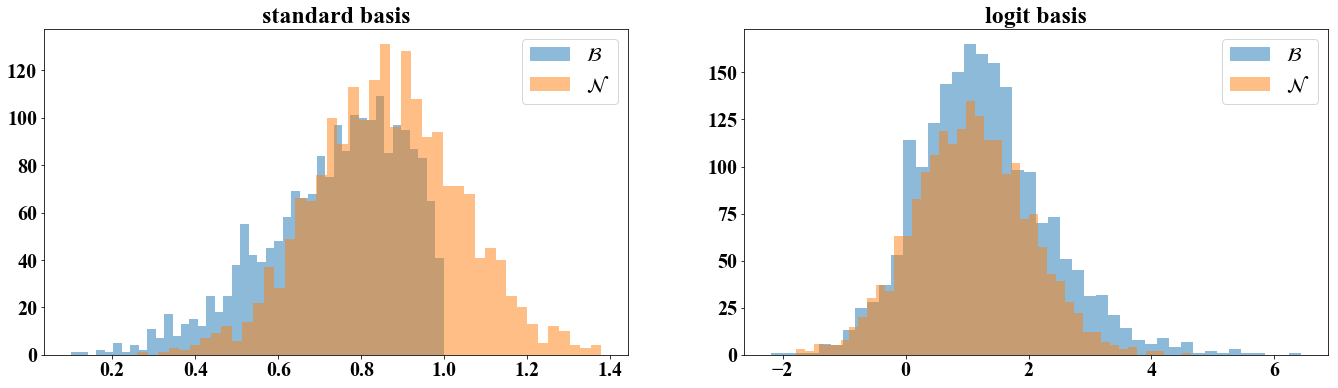

standard:  0.013789653778076172 logit:  0.004299819469451904
a:  4.6 b:  2.1


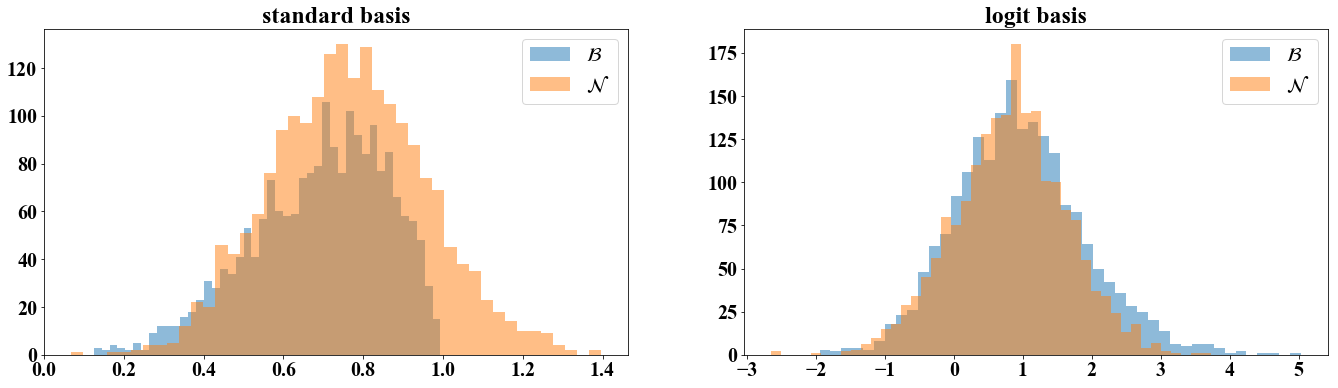

standard:  0.00481104850769043 logit:  0.004051685333251953
a:  4.6 b:  2.6


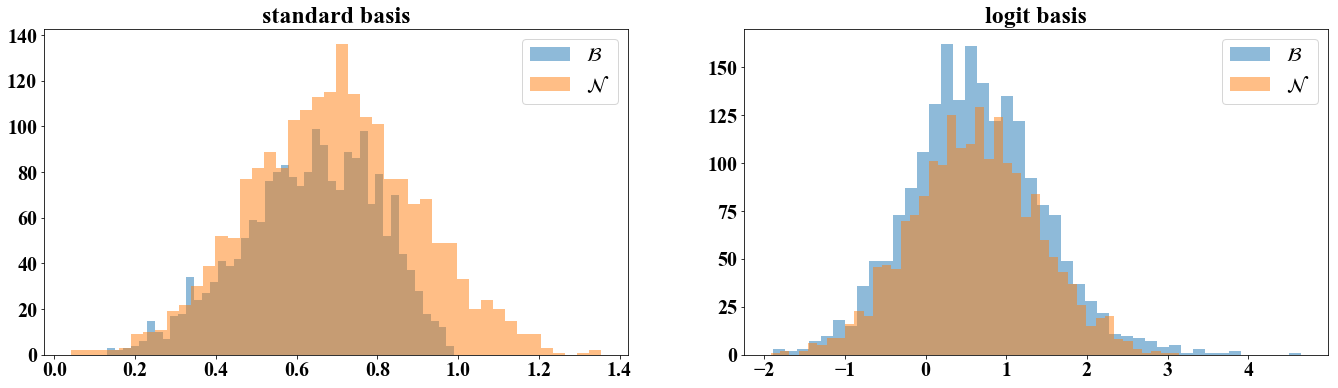

standard:  0.002976059913635254 logit:  0.0
a:  4.6 b:  3.1


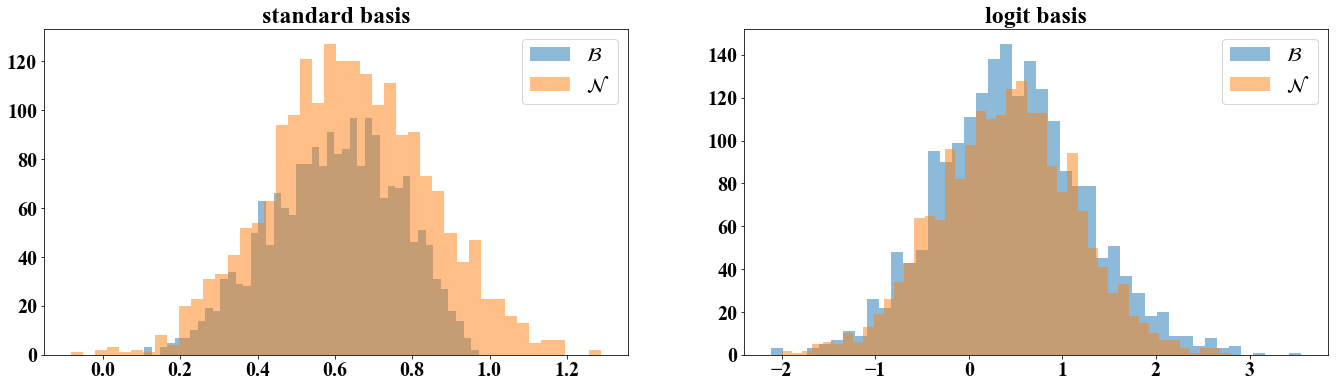

standard:  0.0012793540954589844 logit:  0.00067901611328125
a:  4.6 b:  3.6


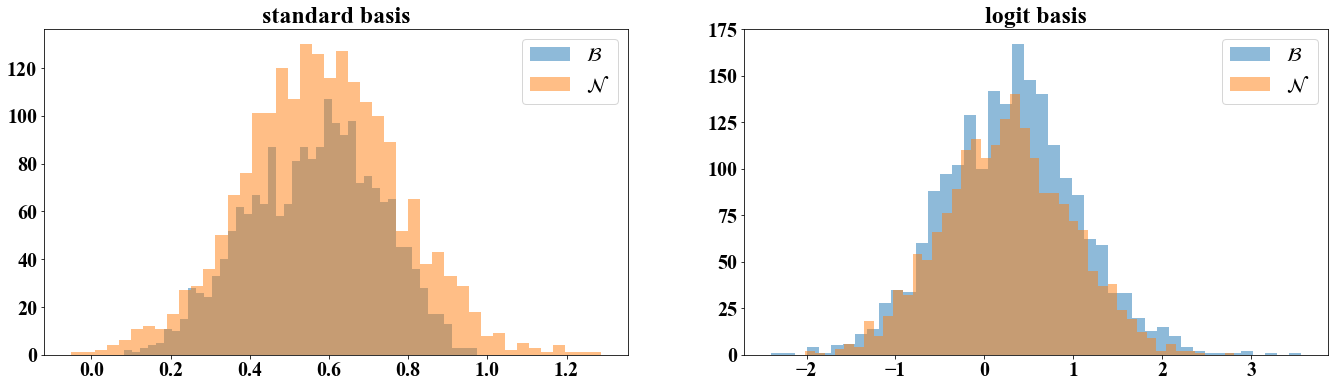

standard:  0.000261843204498291 logit:  0.000530242919921875
a:  4.6 b:  4.1


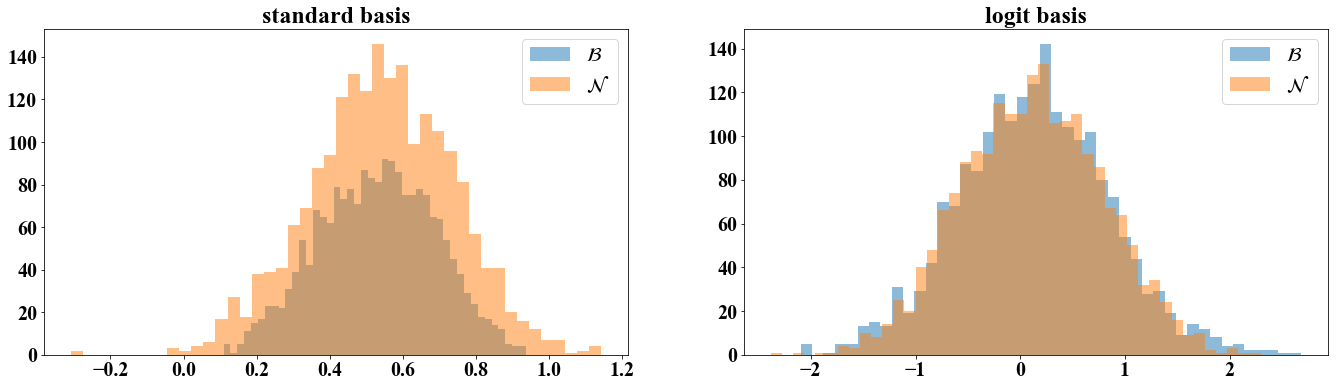

standard:  0.00018209218978881836 logit:  0.0
a:  4.6 b:  4.6


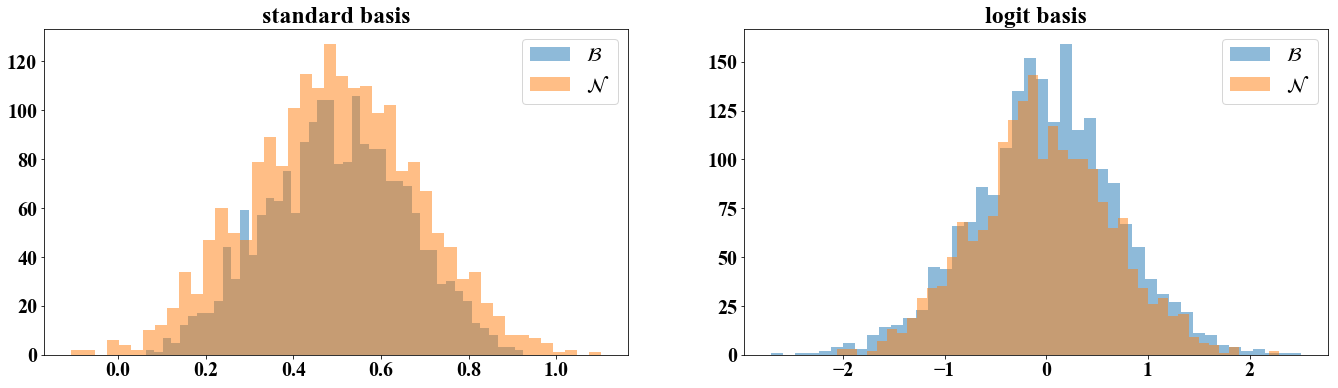

standard:  7.87973403930664e-05 logit:  0.00043326616287231445


(0.9544384479522705, 0.19938966631889343)

In [140]:
MMD_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=True, verbose=True, n_samples=2000)

In [52]:
results_MMD = np.array([0.9365966320037842, 0.2407502830028534])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.25704799]


## KL-divergence (mode seeking/backward, from PDF)

In [60]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [61]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))
    
    #fill NaNs with 0
    KL_div = np.nan_to_num(KL_div)

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
    
    #normalize for comparison
    KL_div /= np.max(pdf_1)
        
    return(KL_div)

In [110]:
def adjust_dist(a, b, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "logit":
        x_large = np.linspace(-100, 100, 1000)
    else:
        x_large = np.linspace(-100, 100, 1000)
        
    if base == "standard":
        
        mode = beta_mu(a, b)
        sigma = np.sqrt(beta_var(a, b))
        
        #get the range of x
        B_pdf_large = beta_pdf(x_large, a, b)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        range_ = np.max([np.sum(B_pdf_large > 1e-5), np.sum(N_pdf_large > 1e-5)])
        lower = 0.5 - range_/10
        upper = 0.5 + range_/10
        x_plus = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        B_pdf = beta_pdf(x_plus, a, b)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, B_pdf, N_pdf)
    
    if base == "logit":
        
        mode_logit = beta_t_logit_mu(a, b)
        sigma_logit = np.sqrt(beta_t_logit_var(a, b))
        
        #get the range of x
        B_pdf_large = beta_t_logit_pdf(x_large, a, b)
        N_pdf_large = normal_pdf(x_large, mode_logit, sigma_logit)
        range_ = np.max([np.sum(B_pdf_large > 1e-5), np.sum(N_pdf_large > 1e-5)])
        lower = mode_logit - range_/10
        upper = mode_logit + range_/10
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        B_pdf = beta_t_logit_pdf(x, a, b)
        N_pdf = normal_pdf(x, mode_logit, sigma_logit)
        
        return(x, B_pdf, N_pdf)
        
        
        

In [111]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_t_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                break
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                x, B_pdf, N_pdf = adjust_dist(a,b, 'standard')
            x_logit, B_pdf_logit, N_pdf_logit = adjust_dist(a,b, 'logit')
            
            #calculate the KL divergences for all bases
            if a >= 1 and b >= 1:
                KL_div_ = KL_divergence_pdf(x, B_pdf, N_pdf, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_logit_ = KL_divergence_pdf(x_logit, B_pdf_logit, N_pdf_logit, plot=plot)
            
            #add them to their respective sums
            if a >= 1 and b >= 1:
                KL_div_sum += KL_div_
            else:
                KL_div_sum += np.nan
                
            KL_div_t_logit_sum += KL_div_logit_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_t_logit_sum)

a:  1.1 b:  1.1


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


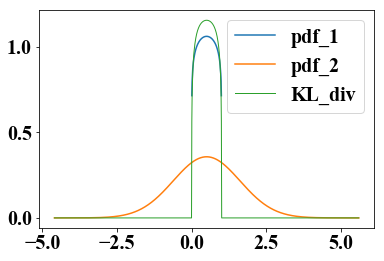

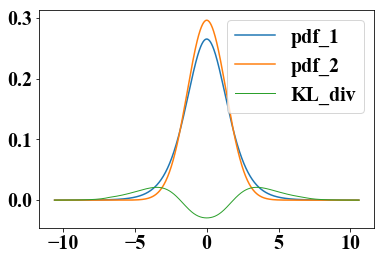

standard:  104.38677565670675 logit:  9.879192078698434
a:  1.1 b:  1.6


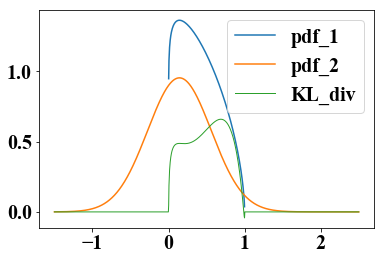

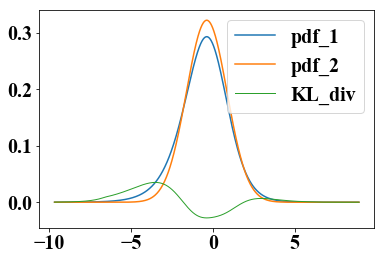

standard:  126.70139892831642 logit:  10.63646181232441
a:  1.1 b:  2.1


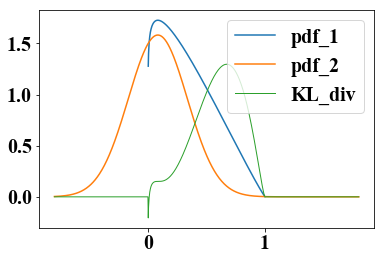

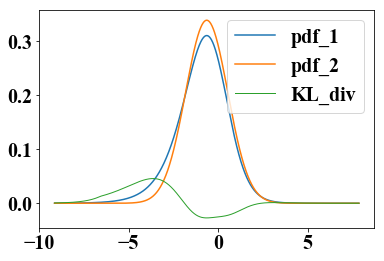

standard:  261.6936784037139 logit:  13.232543073102534
a:  1.1 b:  2.6


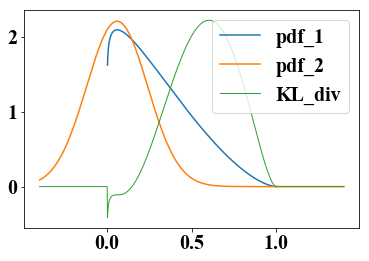

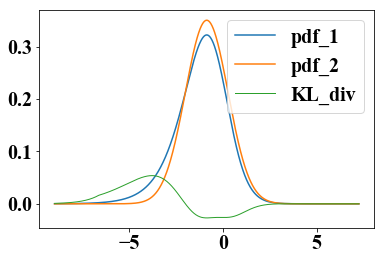

standard:  605.235665035318 logit:  15.830449530585174
a:  1.1 b:  3.1


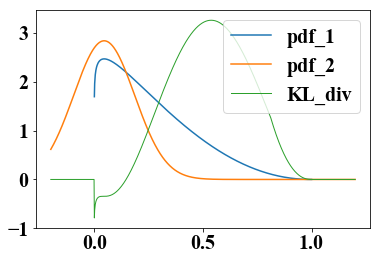

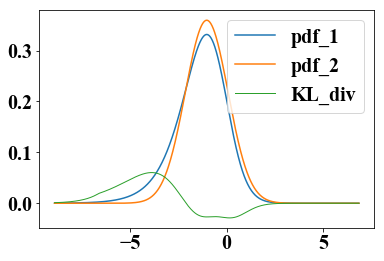

standard:  1113.762513105863 logit:  17.816495542213485
a:  1.1 b:  3.6


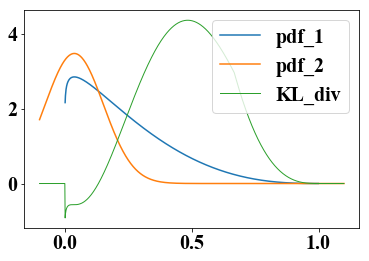

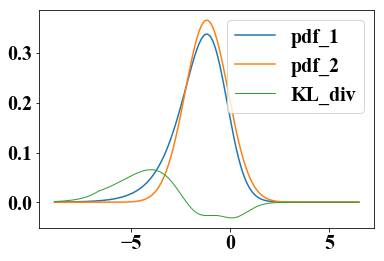

standard:  1625.0699483148082 logit:  19.515370158161517
a:  1.1 b:  4.1


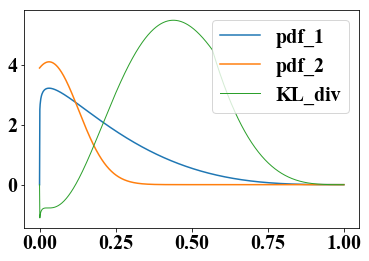

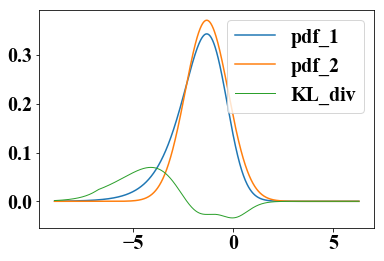

standard:  2257.7098633988367 logit:  20.761141370128044
a:  1.1 b:  4.6


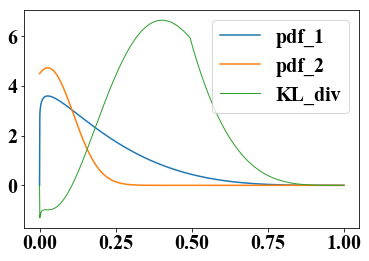

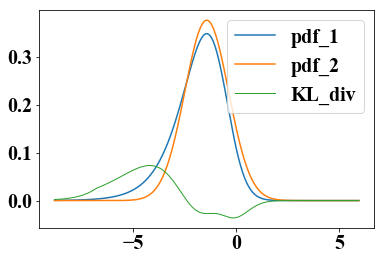

standard:  2501.80501264759 logit:  22.128508848621266
a:  1.6 b:  1.1


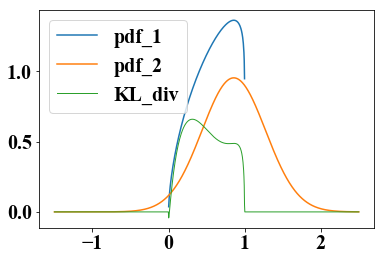

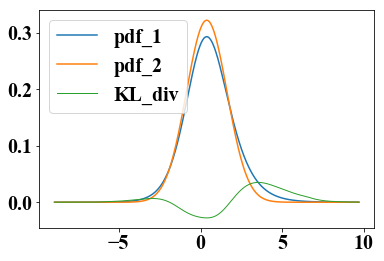

standard:  126.70139892831645 logit:  10.63646181232441
a:  1.6 b:  1.6


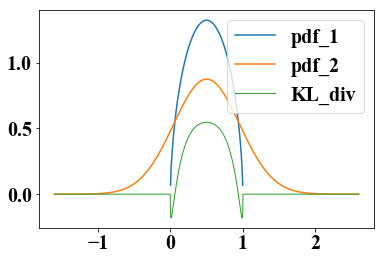

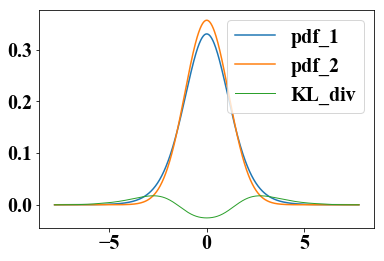

standard:  87.51400913376168 logit:  8.630111611522079
a:  1.6 b:  2.1


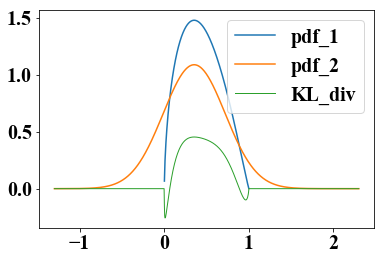

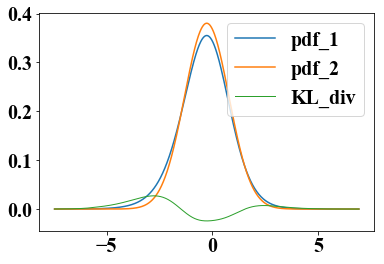

standard:  79.89551561115334 logit:  8.845873928850306
a:  1.6 b:  2.6


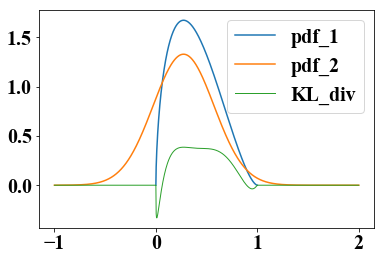

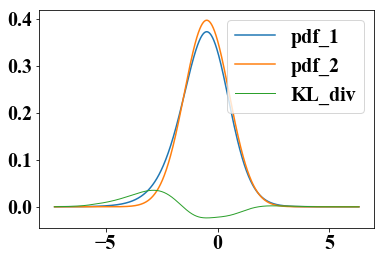

standard:  85.63352170533909 logit:  10.277336166916692
a:  1.6 b:  3.1


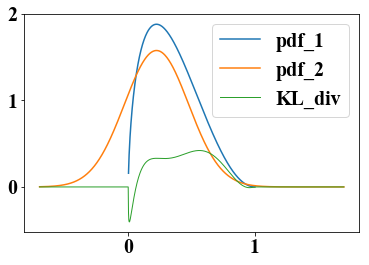

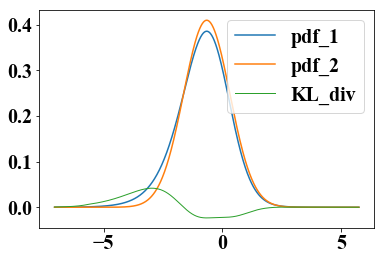

standard:  110.44421372812192 logit:  12.39852087947342
a:  1.6 b:  3.6


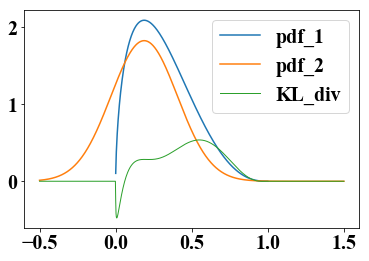

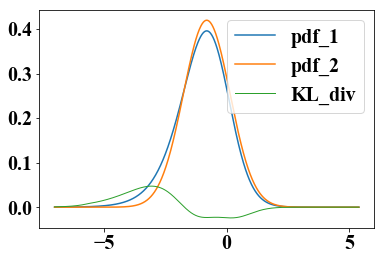

standard:  146.75184766966942 logit:  14.227219169612264
a:  1.6 b:  4.1


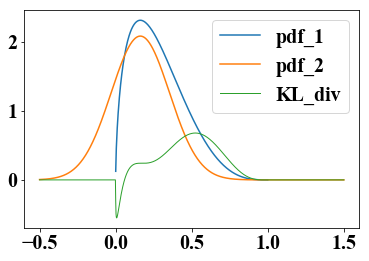

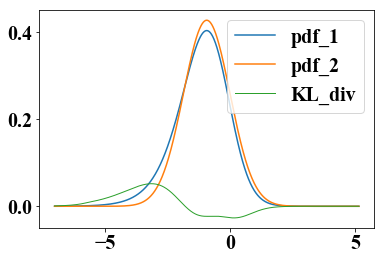

standard:  165.32466949054242 logit:  15.653948456646923
a:  1.6 b:  4.6


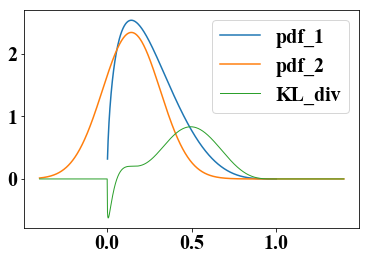

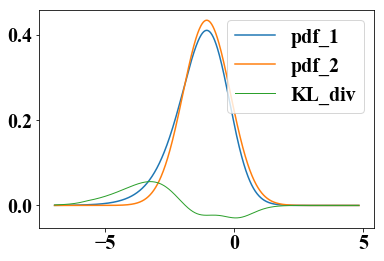

standard:  206.04842574003425 logit:  17.183417481124103
a:  2.1 b:  1.1


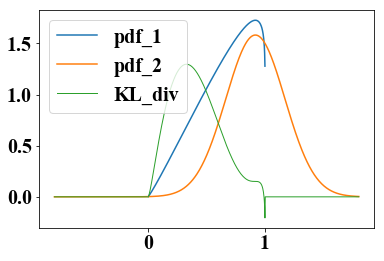

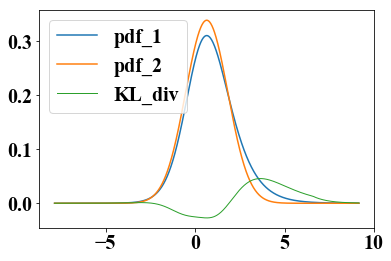

standard:  261.6936784037138 logit:  13.232543073102553
a:  2.1 b:  1.6


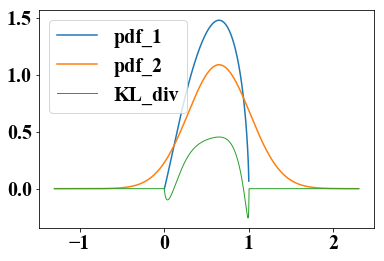

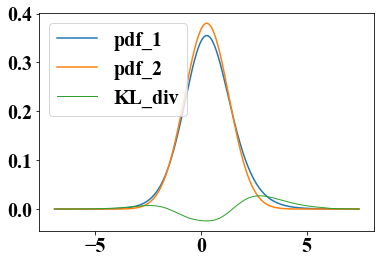

standard:  79.89551561115336 logit:  8.845873928850308
a:  2.1 b:  2.1


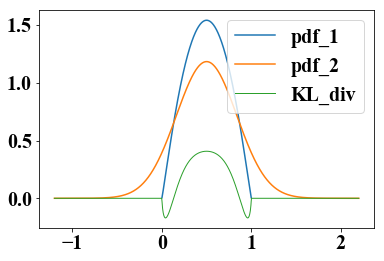

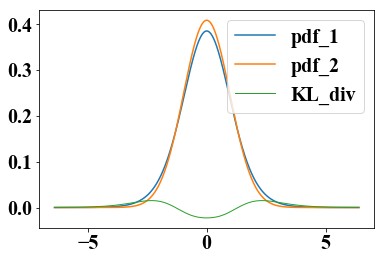

standard:  70.87097590443773 logit:  7.675932412782691
a:  2.1 b:  2.6


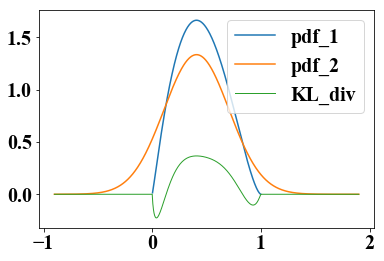

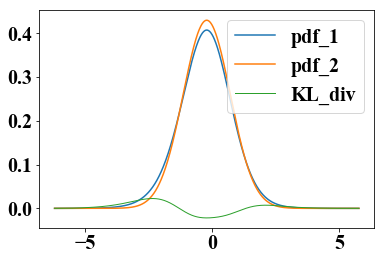

standard:  74.87668314272176 logit:  7.790771865880291
a:  2.1 b:  3.1


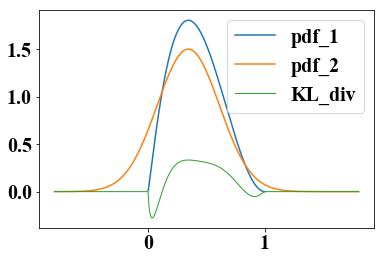

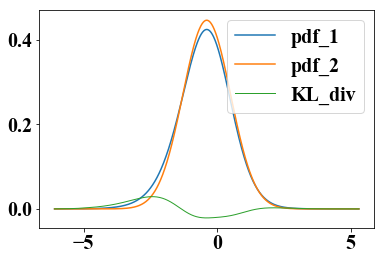

standard:  73.96148729374153 logit:  8.7814772967761
a:  2.1 b:  3.6


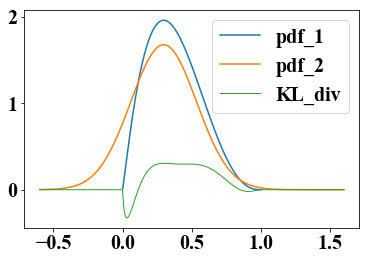

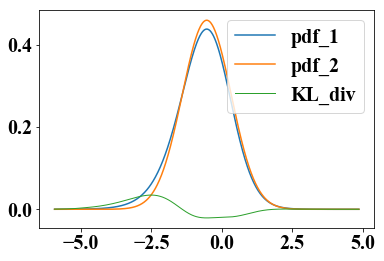

standard:  86.31765678802935 logit:  10.401689725597524
a:  2.1 b:  4.1


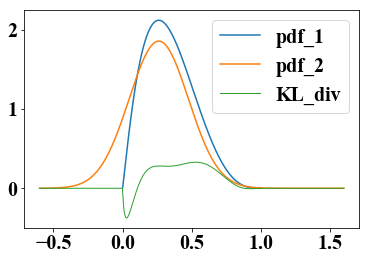

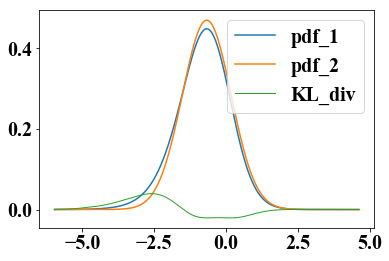

standard:  90.33457905690577 logit:  11.830205367859273
a:  2.1 b:  4.6


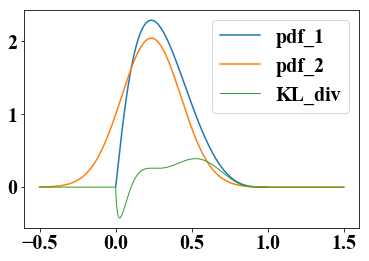

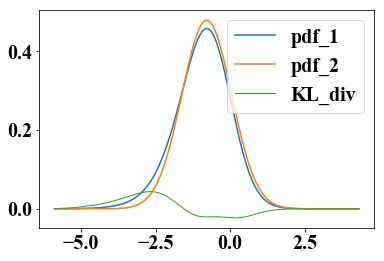

standard:  106.68430485042947 logit:  13.415878591961956
a:  2.6 b:  1.1


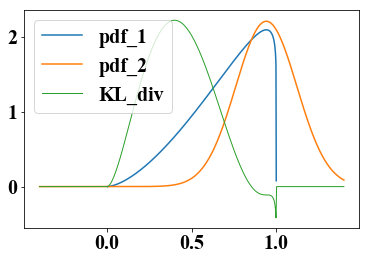

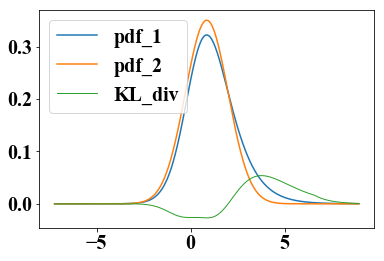

standard:  605.4920036725123 logit:  15.830449530585181
a:  2.6 b:  1.6


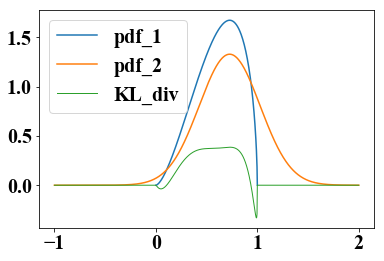

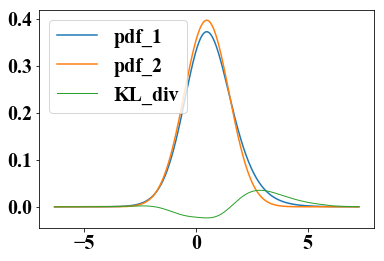

standard:  85.63352170533909 logit:  10.277336166916696
a:  2.6 b:  2.1


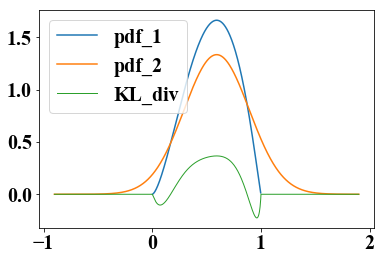

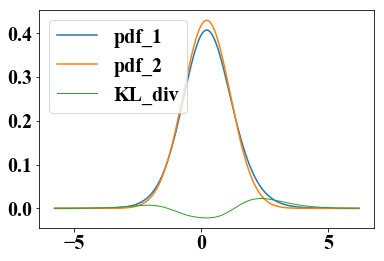

standard:  74.87668314272176 logit:  7.790771865880288
a:  2.6 b:  2.6


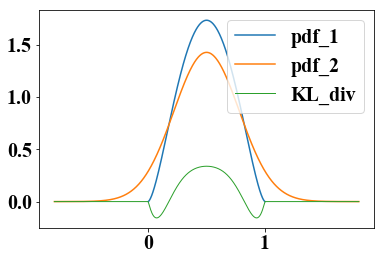

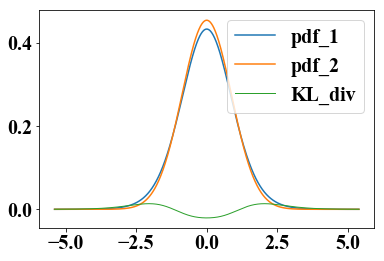

standard:  71.67268568904383 logit:  7.1354256959179025
a:  2.6 b:  3.1


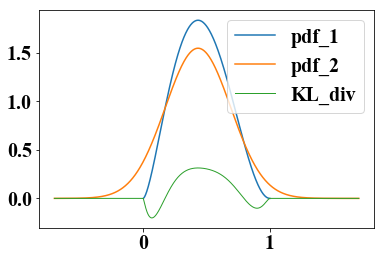

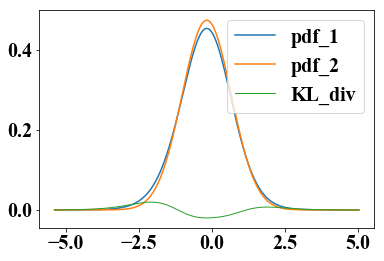

standard:  70.42355327579956 logit:  7.090565461378393
a:  2.6 b:  3.6


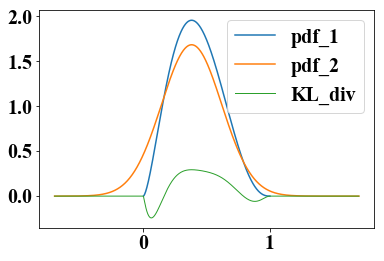

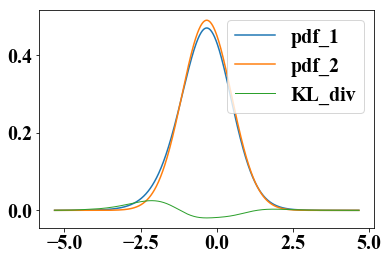

standard:  65.84244521328839 logit:  7.769313329617534
a:  2.6 b:  4.1


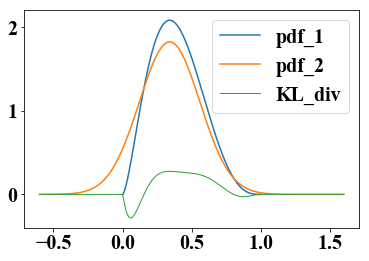

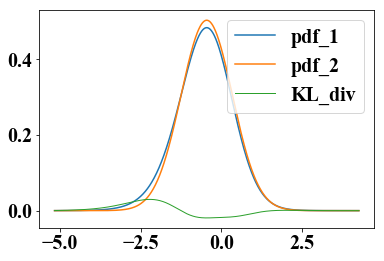

standard:  70.34992962577921 logit:  9.154505675051212
a:  2.6 b:  4.6


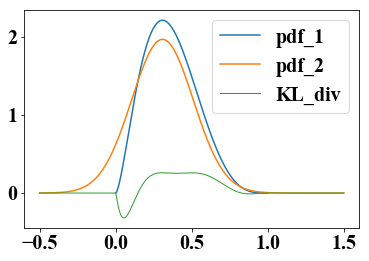

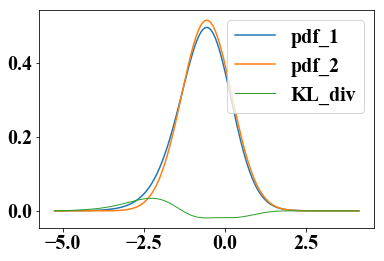

standard:  79.29638617044971 logit:  10.20909372983088
a:  3.1 b:  1.1


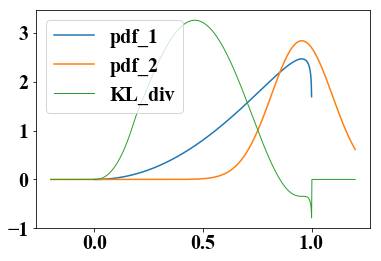

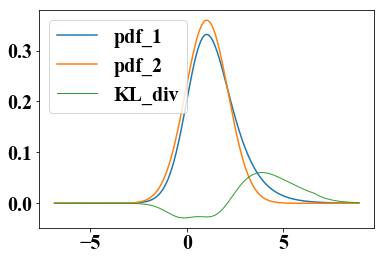

standard:  1113.7625131058628 logit:  17.816495542213485
a:  3.1 b:  1.6


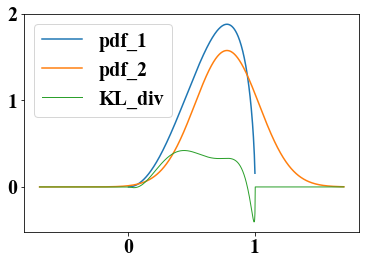

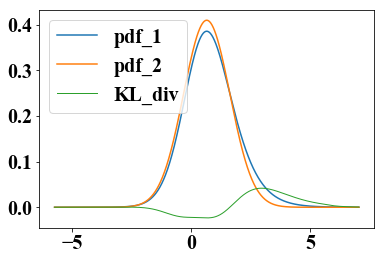

standard:  110.44421372812195 logit:  12.398520879473427
a:  3.1 b:  2.1


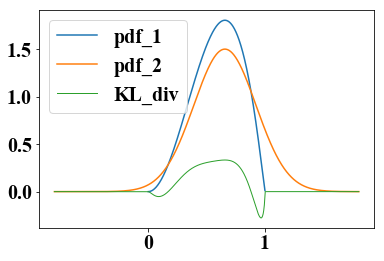

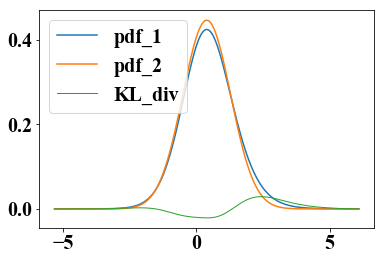

standard:  73.96148729374151 logit:  8.781477296776103
a:  3.1 b:  2.6


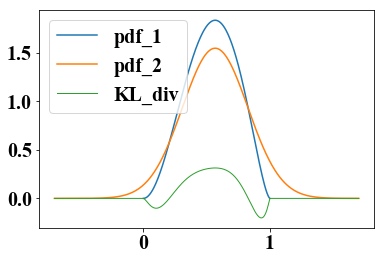

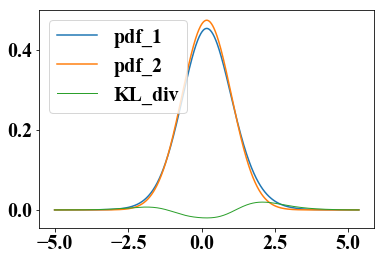

standard:  70.42355327579958 logit:  7.090565461378397
a:  3.1 b:  3.1


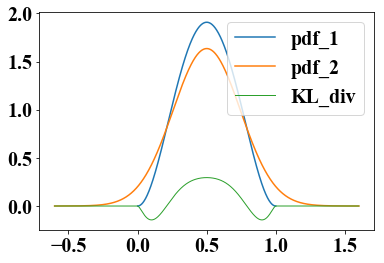

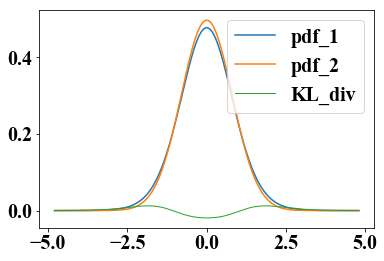

standard:  70.16784042535934 logit:  6.592867460112428
a:  3.1 b:  3.6


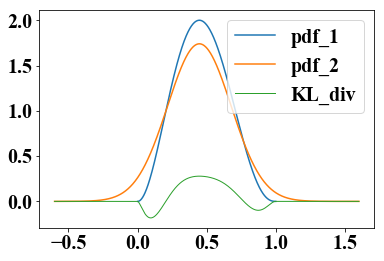

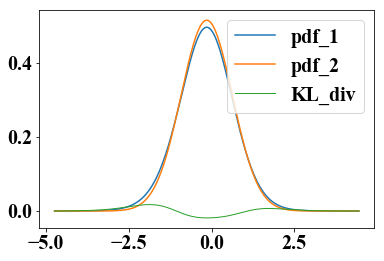

standard:  65.03414222419319 logit:  6.614375496920863
a:  3.1 b:  4.1


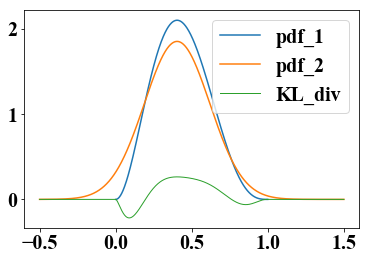

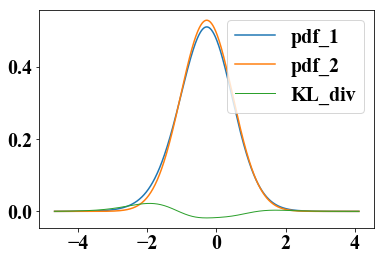

standard:  67.74215945233468 logit:  7.204177735307278
a:  3.1 b:  4.6


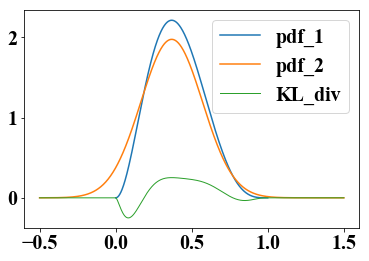

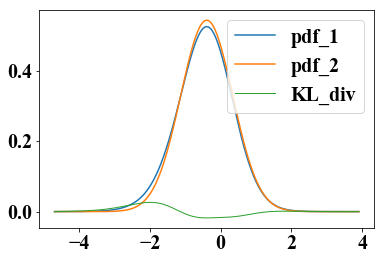

standard:  66.2967921072732 logit:  8.071006136350064
a:  3.6 b:  1.1


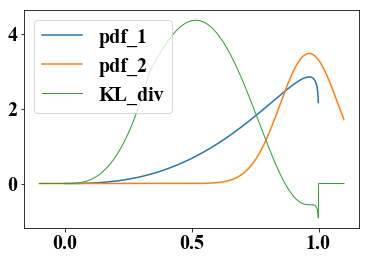

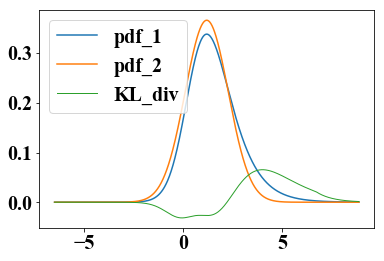

standard:  1625.0699483148082 logit:  19.51537015816151
a:  3.6 b:  1.6


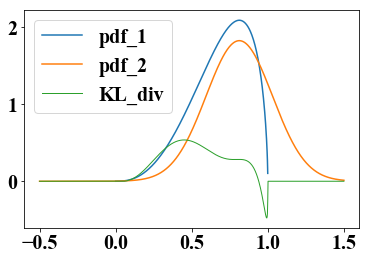

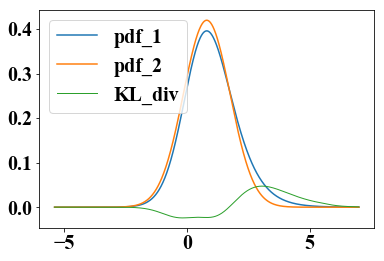

standard:  146.75184766966942 logit:  14.227219169612264
a:  3.6 b:  2.1


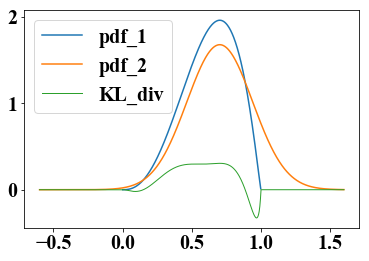

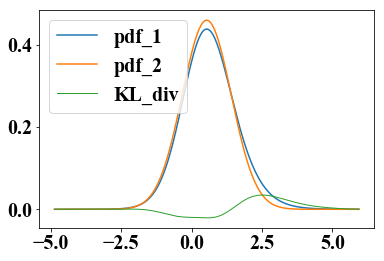

standard:  86.3176567880294 logit:  10.401689725597521
a:  3.6 b:  2.6


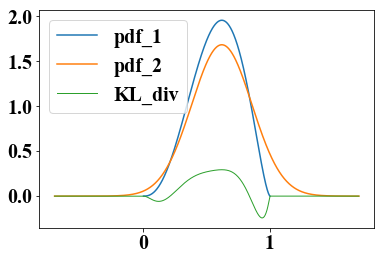

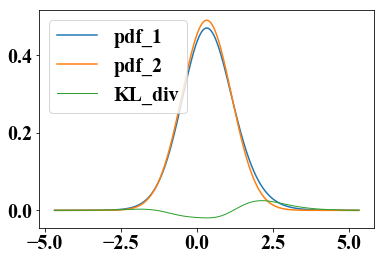

standard:  65.8424452132884 logit:  7.769313329617528
a:  3.6 b:  3.1


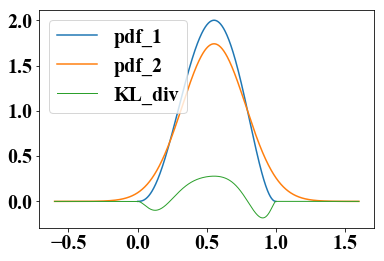

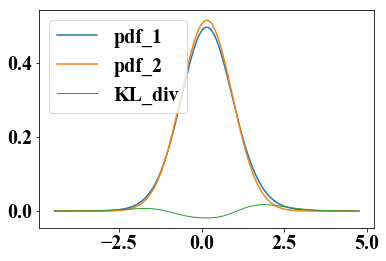

standard:  65.03414222419319 logit:  6.614375496920855
a:  3.6 b:  3.6


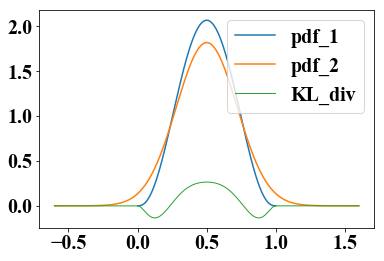

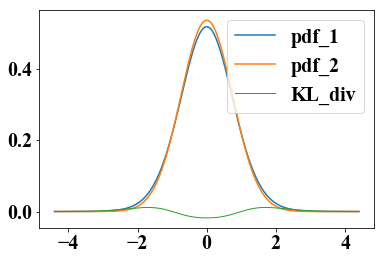

standard:  60.32315718544611 logit:  6.097132832564468
a:  3.6 b:  4.1


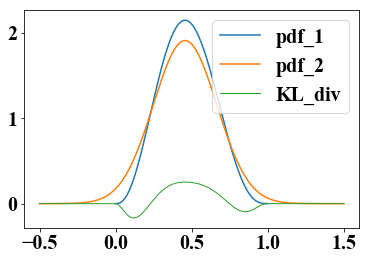

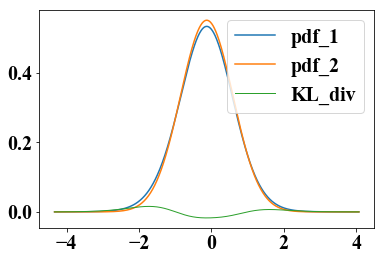

standard:  62.32429268597765 logit:  6.16587193456796
a:  3.6 b:  4.6


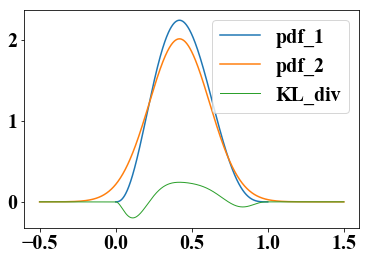

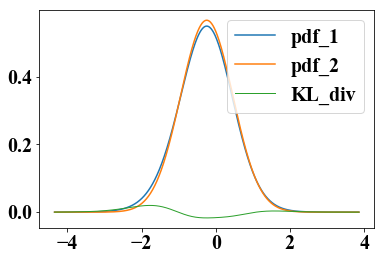

standard:  59.54525107120767 logit:  6.529282764344284
a:  4.1 b:  1.1


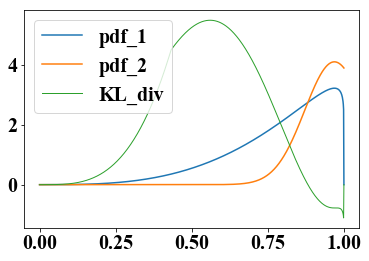

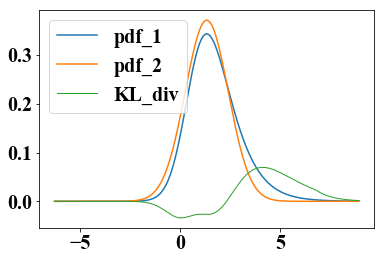

standard:  2257.709863398839 logit:  20.761141370128037
a:  4.1 b:  1.6


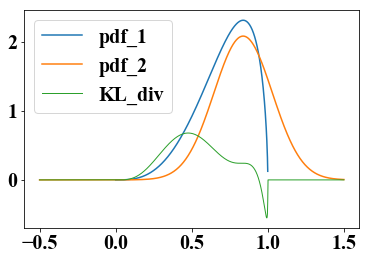

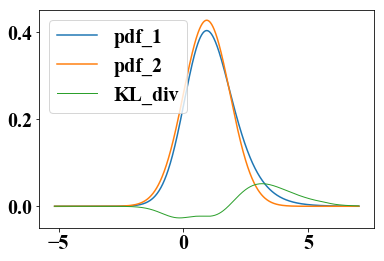

standard:  165.32466949054276 logit:  15.653948456646917
a:  4.1 b:  2.1


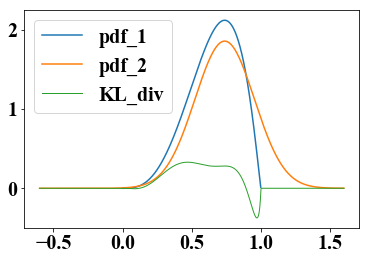

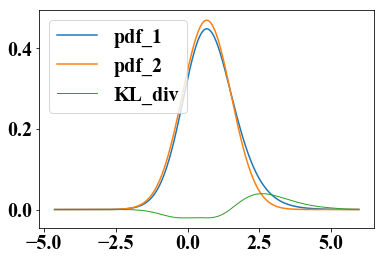

standard:  90.33457905690588 logit:  11.830205367859282
a:  4.1 b:  2.6


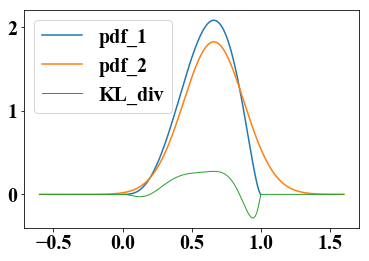

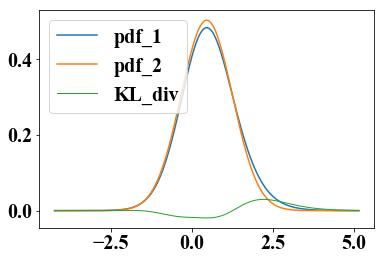

standard:  70.3499296257793 logit:  9.154505675051217
a:  4.1 b:  3.1


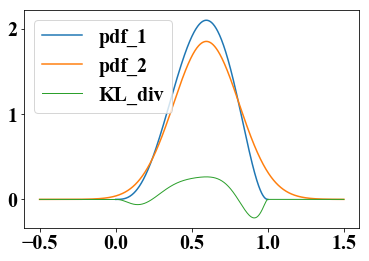

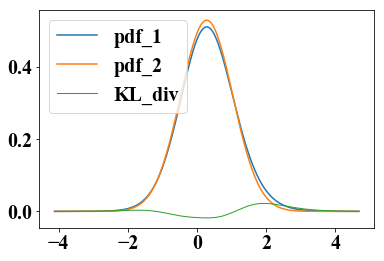

standard:  67.7421594523347 logit:  7.20417773530728
a:  4.1 b:  3.6


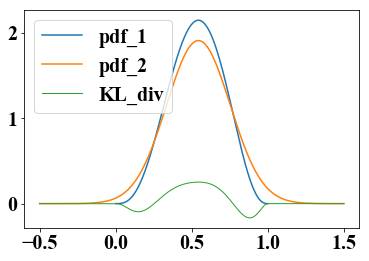

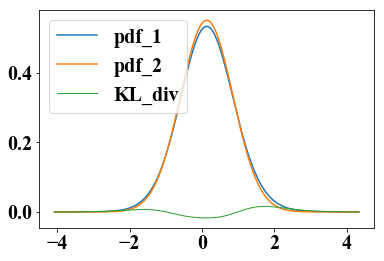

standard:  62.32429268597768 logit:  6.165871934567956
a:  4.1 b:  4.1


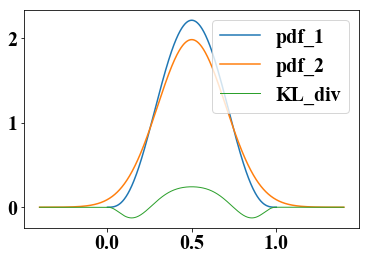

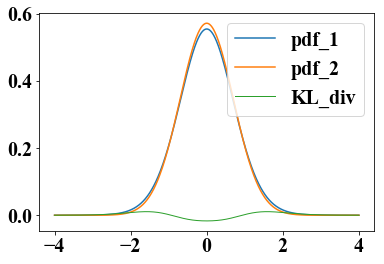

standard:  64.8916745563497 logit:  5.817559931856166
a:  4.1 b:  4.6


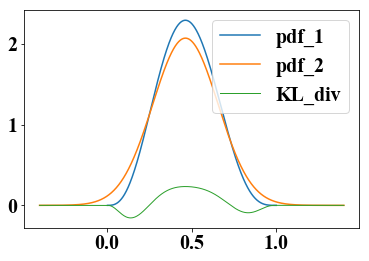

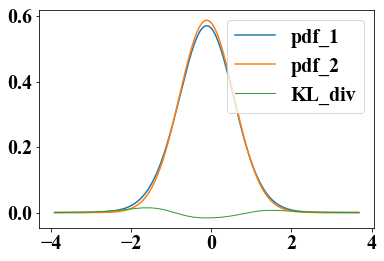

standard:  61.50490786229538 logit:  5.930654724830456
a:  4.6 b:  1.1


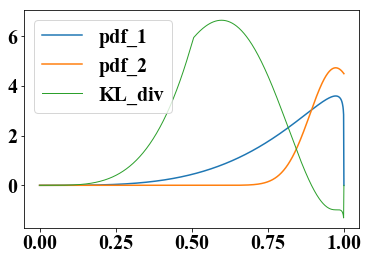

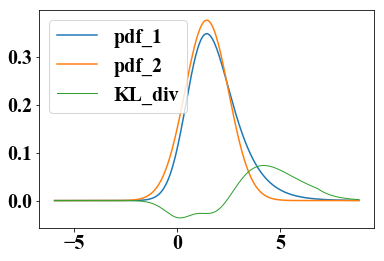

standard:  2501.805012647591 logit:  22.128508848621287
a:  4.6 b:  1.6


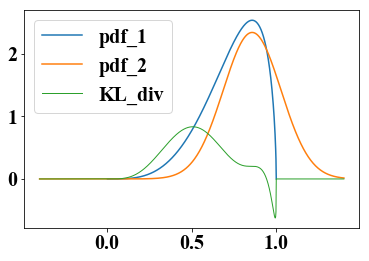

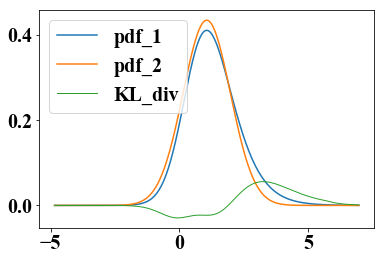

standard:  206.04843799003442 logit:  17.183417481124103
a:  4.6 b:  2.1


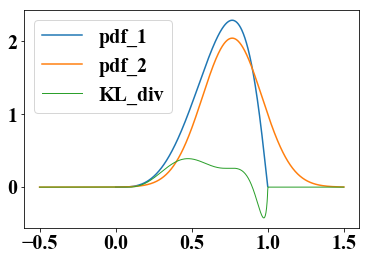

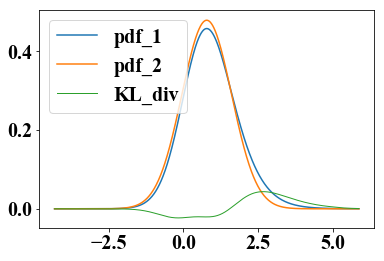

standard:  106.68430485042956 logit:  13.415878591961954
a:  4.6 b:  2.6


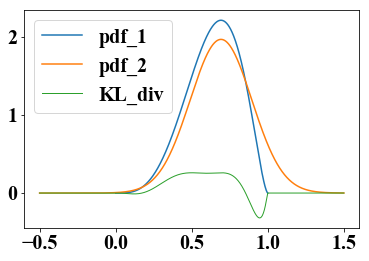

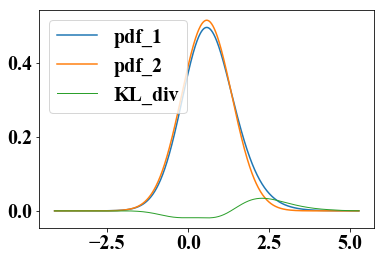

standard:  79.29638617044976 logit:  10.209093729830883
a:  4.6 b:  3.1


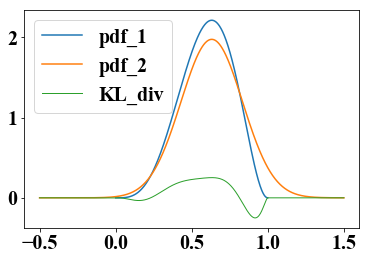

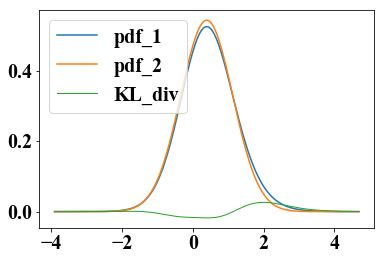

standard:  66.29679210727319 logit:  8.071006136350066
a:  4.6 b:  3.6


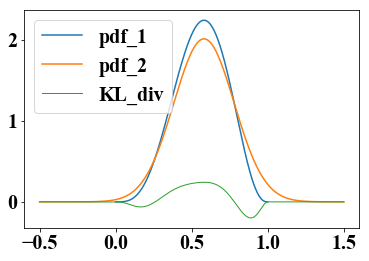

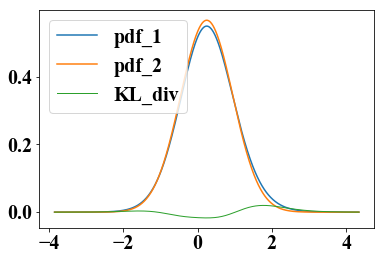

standard:  59.54525107120772 logit:  6.529282764344286
a:  4.6 b:  4.1


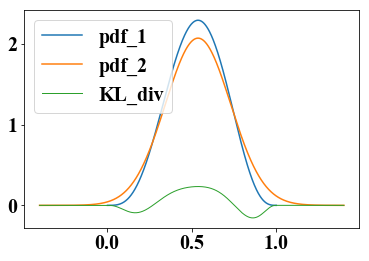

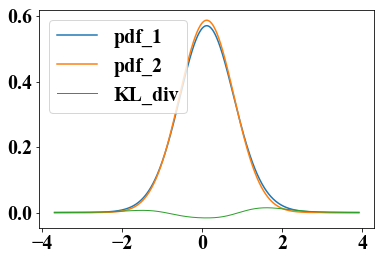

standard:  61.504908867895736 logit:  5.930654724830456
a:  4.6 b:  4.6


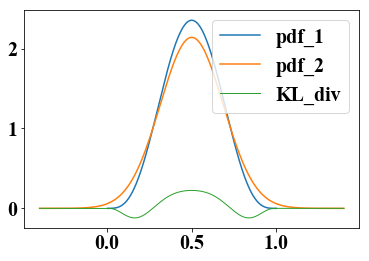

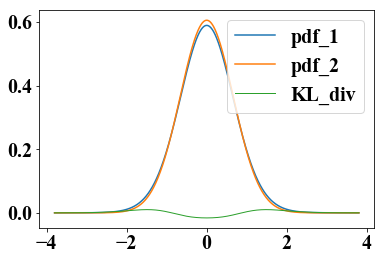

standard:  58.06061752754381 logit:  5.406009439027402
(21361.36577717092, 708.1665439705503)


In [112]:
print(KL_div_pdf_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=True, verbose=True))

In [113]:
results_KL_pdf = np.array([21361.36577717092, 708.1665439705503])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.03315174]


# Statistical distance measures for small, medium and large $\theta$

modes:  0.28571428571428564 0.75 0.6


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


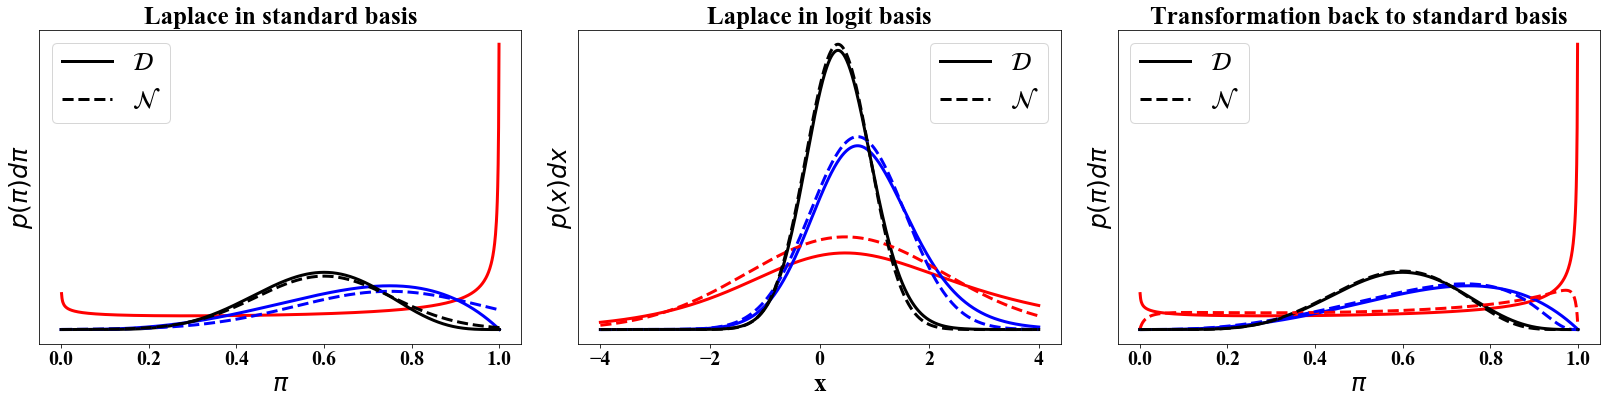

In [148]:
a_s, b_s = 0.8, 0.5
a_m, b_m = 4,2
a_l, b_l = 7,5
plot_beta_t_logit(params=[[a_s, b_s], [a_m, b_m], [a_l, b_l]])

## calculate MMD for the three pairs of parameters

seed:  0
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.012014329433441162
a:  4 b:  2
standard:  0.006939589977264404 logit:  0.0016475915908813477
a:  7 b:  5


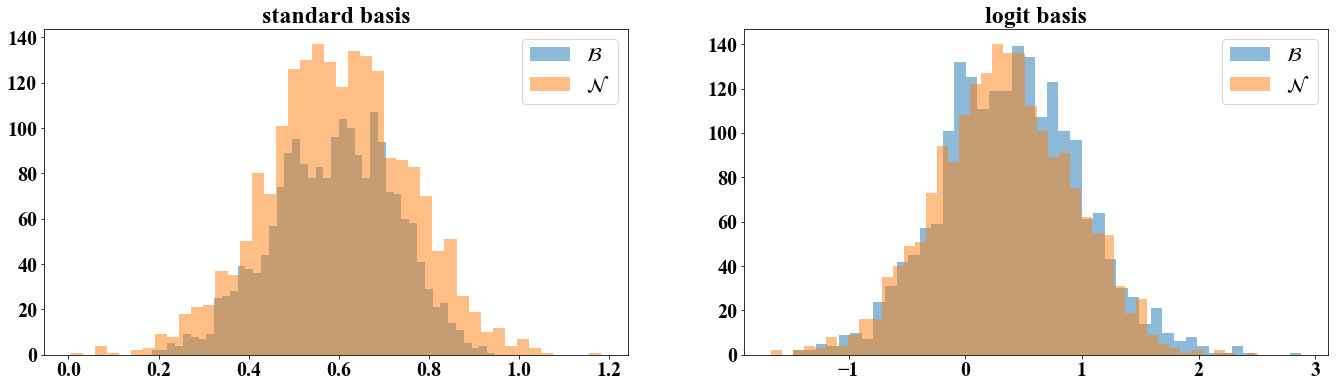

standard:  7.301568984985352e-05 logit:  0.0010191798210144043
seed:  1
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011222034692764282
a:  4 b:  2
standard:  0.0066031813621521 logit:  0.0031464099884033203
a:  7 b:  5


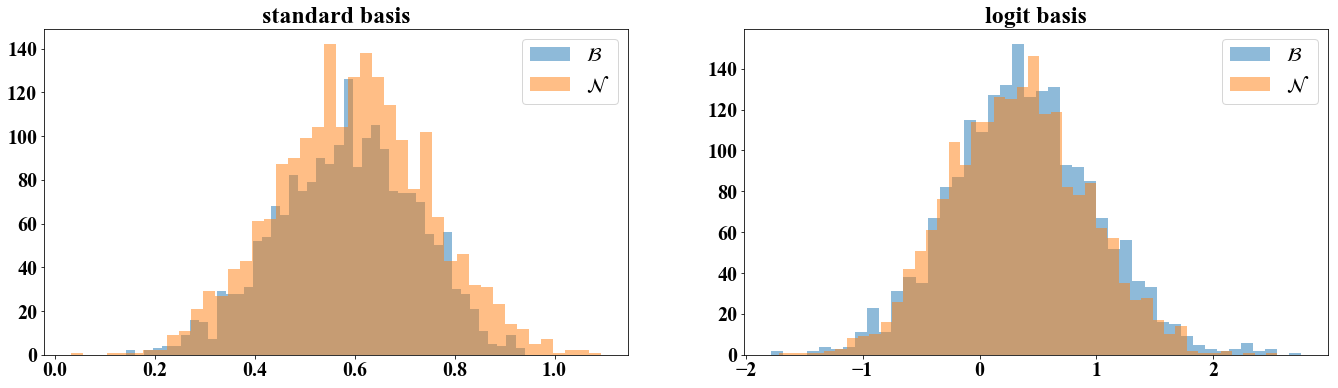

standard:  0.00010603666305541992 logit:  0.000841677188873291
seed:  2
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.012215793132781982
a:  4 b:  2
standard:  0.007103621959686279 logit:  0.001752316951751709
a:  7 b:  5


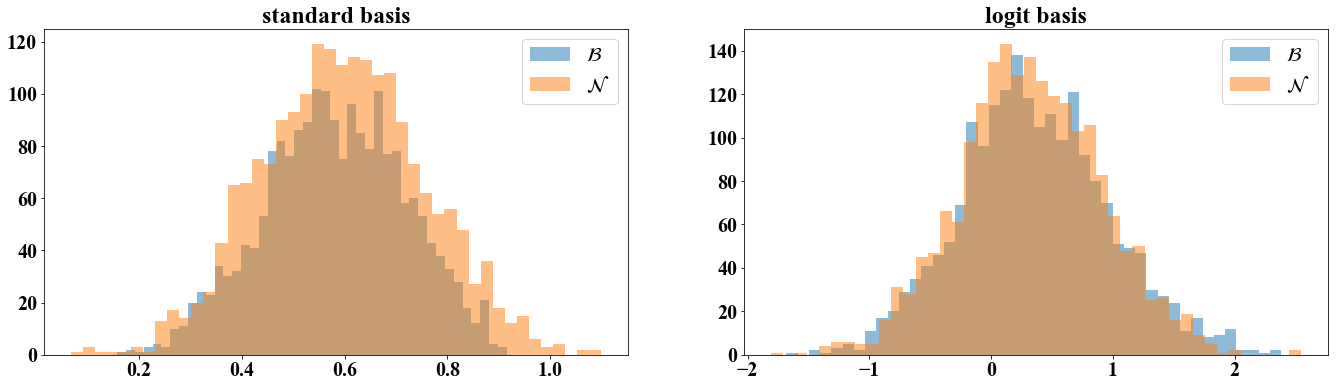

standard:  0.00022989511489868164 logit:  0.0003730654716491699
seed:  3
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.014719188213348389
a:  4 b:  2
standard:  0.006532728672027588 logit:  0.0025659799575805664
a:  7 b:  5


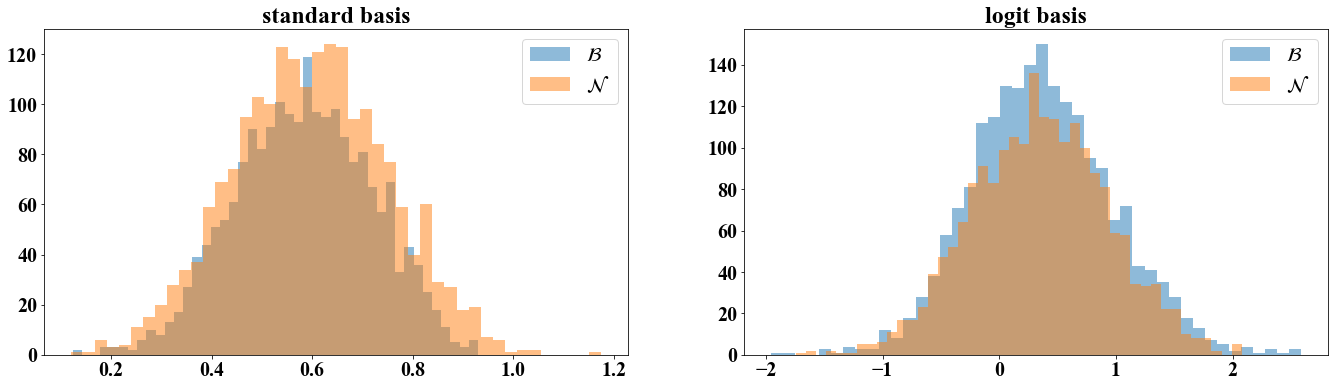

standard:  0.00014728307723999023 logit:  0.0
seed:  4
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.014577031135559082
a:  4 b:  2
standard:  0.0065048933029174805 logit:  0.0034673213958740234
a:  7 b:  5


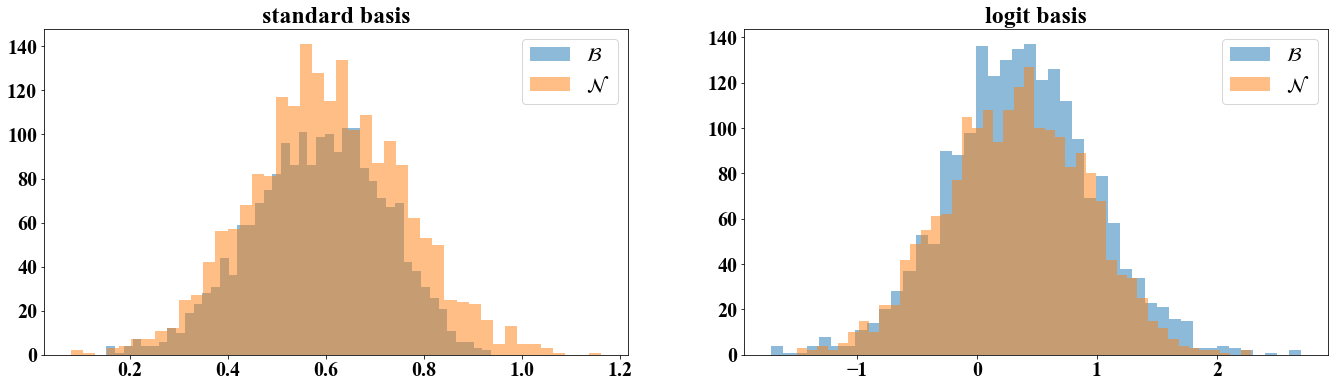

standard:  0.00033086538314819336 logit:  0.0005698800086975098
seed:  5
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.01167646050453186
a:  4 b:  2
standard:  0.006627261638641357 logit:  0.0026376843452453613
a:  7 b:  5


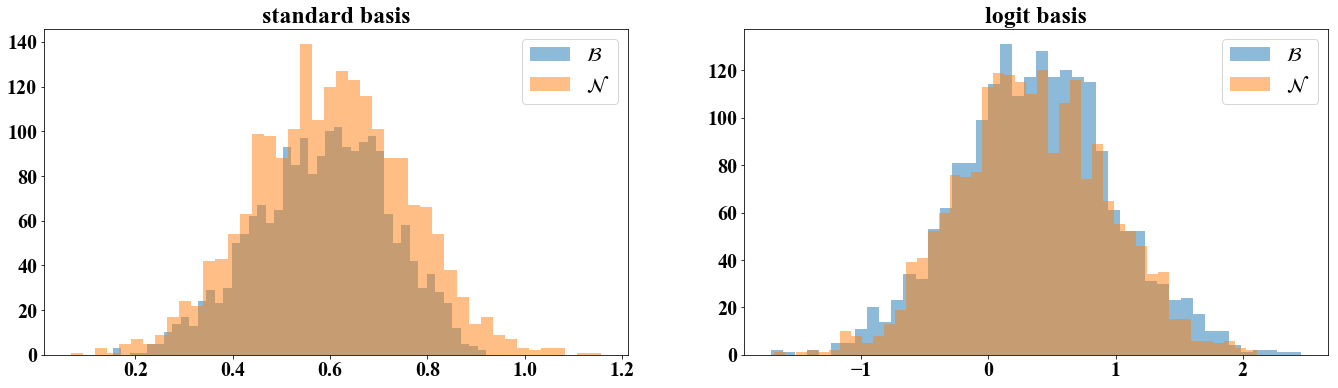

standard:  0.00019276142120361328 logit:  0.00017058849334716797
seed:  6
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.015817254781723022
a:  4 b:  2
standard:  0.0061501264572143555 logit:  0.0017998218536376953
a:  7 b:  5


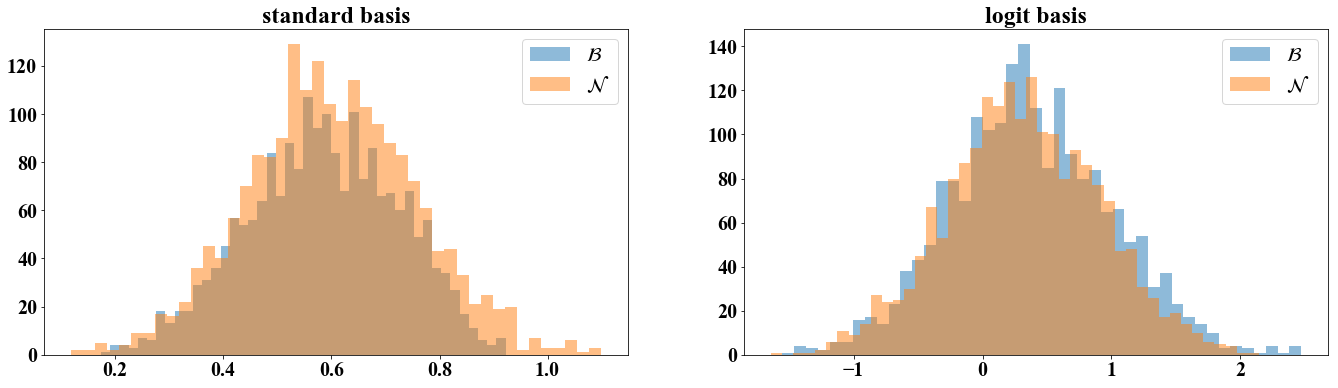

standard:  0.00024372339248657227 logit:  0.001101374626159668
seed:  7
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.015067636966705322
a:  4 b:  2
standard:  0.006160378456115723 logit:  0.004197537899017334
a:  7 b:  5


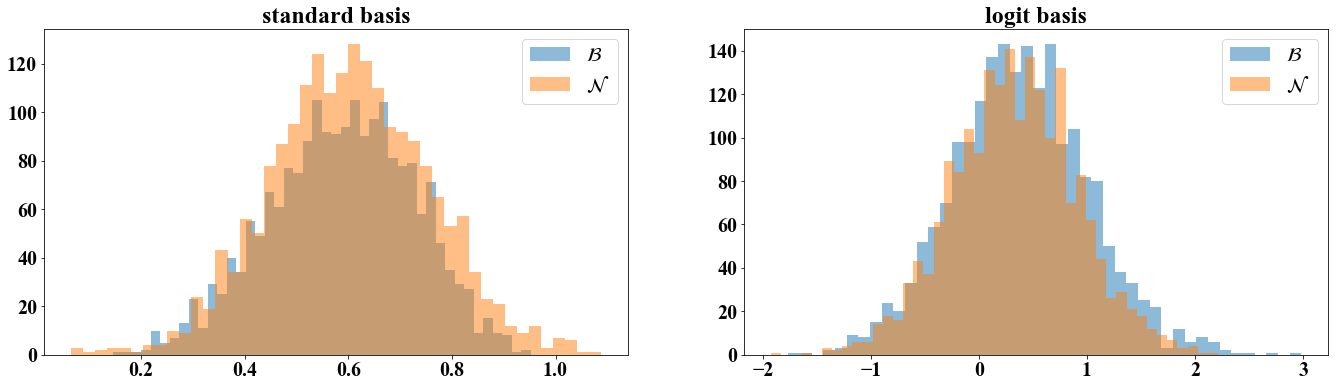

standard:  0.00022995471954345703 logit:  0.0014638900756835938
seed:  8
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011353224515914917
a:  4 b:  2
standard:  0.006209313869476318 logit:  0.002568840980529785
a:  7 b:  5


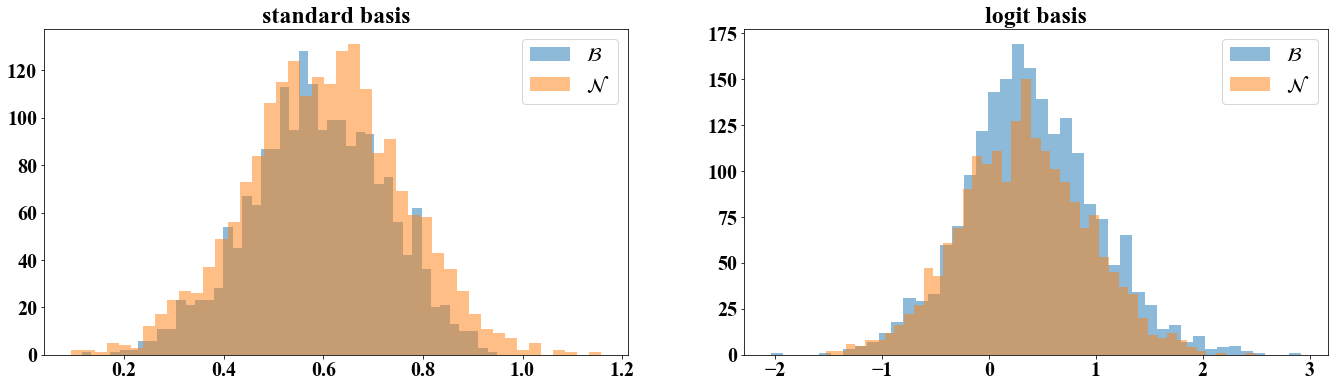

standard:  0.00014322996139526367 logit:  0.0014276504516601562
seed:  9
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011298149824142456
a:  4 b:  2
standard:  0.00678253173828125 logit:  0.0007564425468444824
a:  7 b:  5


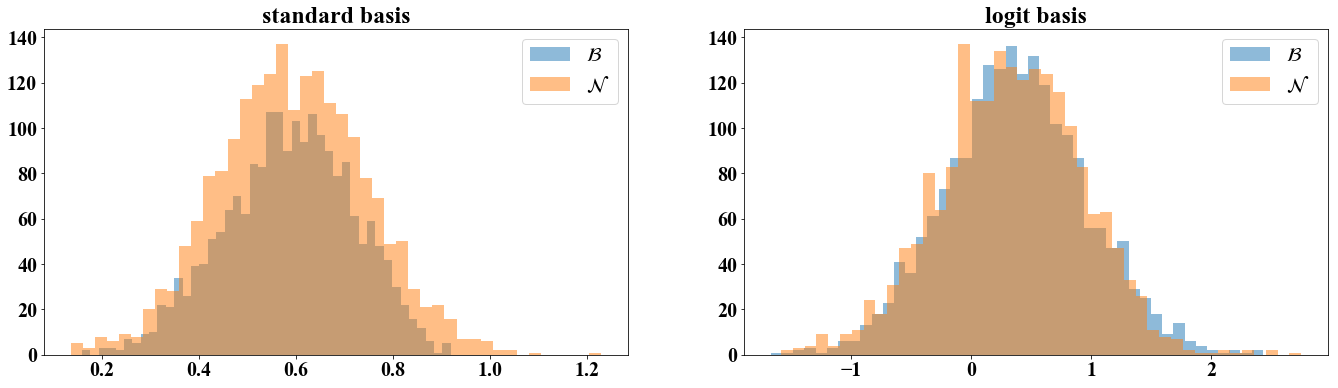

standard:  3.463029861450195e-05 logit:  0.00039780139923095703
[       nan 0.01299611]
[0.00656136 0.00245399]
[0.00017314 0.00073651]


In [149]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [b_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [b_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [b_l]], n_samples=2000, plot=True)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

In [151]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[nan  1.]
[1.         0.37400687]
[0.23508085 1.        ]
